Date Created = 2 April 2019

Date Completed = 

Objective = The objective of this file is to explore the dataset and map the relationship of the predictors and target variable.

Conclusion = 

In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import numpy as np
import pandas as pd
import random_csv_selector
from preprocess import data_preprocessor
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 200)
sns.set_style("darkgrid")

In [4]:
#filename_1 = random_csv_selector.csv()
#print(filename_1)

In [5]:
#filename_2 = random_csv_selector.csv()
#print(filename_2)

In [6]:
#filename_3 = random_csv_selector.csv()
#print(filename_3)

In [4]:
#data_1 = pd.read_csv(filename_1)
#data_2 = pd.read_csv(filename_2)
#data_3 = pd.read_csv(filename_3)

data_1 = pd.read_csv("/home/CWSHPMU2316/Desktop/EVRangePrediction/data/raw/358272088699072_2019-01-07_cb.csv")
data_2 = pd.read_csv("/home/CWSHPMU2316/Desktop/EVRangePrediction/data/raw/352891066262722_2018-12-19_cb.csv")
data_3 = pd.read_csv("/home/CWSHPMU2316/Desktop/EVRangePrediction/data/raw/352891066263282_2018-11-26_cb.csv")

In [5]:
len(data_1) + len(data_2) + len(data_3)

787798

In [6]:
#data = pd.read_csv("EDA_Data_01.csv")

In [7]:
data = pd.concat((data_3, data_2, data_1), axis = 0).reset_index()

In [8]:
data.tail()

,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
787793,352195,DEFREG:358272088699072,Trip not started,NaN,77.07341,28.49698,88.02,NaN,1546879002880,77.073343,28.496977,177.59113,1104361856,5,30.0,1.0,9,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,789,0.0,7,10,0,1,1,0.0,1,13.9,0,49.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.15,0.15,3.725,3.725,53.4,53.4,53.0,53.0,100,34.0,34.0,34.0,30.5,31.5,30.5,1.75,1.75,1.75,246.25,246.25,246.25,1800,1810,100.0,100.0,18,36,0,26,47,0,18,23,0,40,80,27,512.0,-0.3,0,-0.2,-0.2,246,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,27,21,0,22,13.9,0,0.0,-105.0,0.0,0,-65532,0,7170,16.0,0,3.0,4.0,65,1,0,0,0,0,140,-81,6.0,-993.0,394.0,NaN
787794,352196,DEFREG:358272088699072,Trip not started,NaN,77.07341,28.49698,88.02,NaN,1546879002980,77.073343,28.496977,177.59113,1104361856,5,30.0,1.0,9,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,789,0.0,7,10,0,1,1,0.0,1,13.9,0,49.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.15,0.15,3.725,3.725,53.4,53.4,53.0,53.0,100,34.0,34.0,34.0,30.5,31.5,30.5,1.75,1.75,1.75,246.25,246.25,246.25,1800,1810,100.0,100.0,18,36,0,26,47,0,18,23,0,40,80,27,512.0,-0.3,0,-0.2,-0.2,246,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,27,21,0,22,13.9,0,0.0,-105.0,0.0,0,-65532,0,7170,16.0,0,3.0,4.0,65,1,0,0,0,0,140,-81,6.0,-993.0,394.0,NaN
787795,352197,DEFREG:358272088699072,Trip not started,NaN,77.07341,28.49698,88.02,NaN,1546879003080,77.073343,28.496977,177.59113,1104361856,5,30.0,1.0,9,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,789,0.0,7,10,0,1,1,0.0,1,13.9,0,49.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.15,0.15,3.725,3.725,53.4,53.4,53.0,53.0,100,34.0,34.0,34.0,30.5,31.5,30.5,1.75,1.75,1.75,246.25,246.25,246.25,1800,1810,100.0,100.0,18,36,0,26,47,0,18,23,0,40,80,27,512.0,-0.3,0,-0.2,-0.2,246,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,27,21,0,22,13.9,0,0.0,-105.0,0.0,0,-65532,0,7170,16.0,0,3.0,4.0,65,1,0,0,0,0,140,-81,6.0,-993.0,394.0,NaN
787796,352198,DEFREG:358272088699072,Trip not started,NaN,77.07341,28.49698,88.02,NaN,1546879003180,77.073343,28.496977,177.59113,1104361856,5,30.0,1.0,9,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,789,0.0,7,10,0,1,1,0.0,1,13.9,0,49.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.15,0.15,3.725,3.725,53.4,53.4,53.0,53.0,100,34.0,34.0,34.0,30.5,31.5,30.5,1.75,1.75,1.75,246.25,246.25

In [9]:
data = data_preprocessor(data)

In [13]:
data[645596:645604]

,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
645596,209998,DEFREG:358272088699072,37,NaN,77.06322,28.49748,214.91,419800,1546858474060,77.063224,28.497477,217.70355,1061904906,3,50.0,1.1,8,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,781,15.5312,23,11,0,0,1,-16.0,1,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.0,0.0,3.825,3.82,67.3,67.2,66.8,66.8,100,29.0,29.0,29.0,27.5,27.5,27.5,-5.0,-4.00,-5.5,252.75,252.75,252.75,1820.0,1820,100.0,100.0,28,48,0,43,52,0,27,33,0,46,80,26,505.5,-16.1,990,179.4,-180.6,252,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,34,28,0,12,13.9,0,-0.3750,-215.75,0.1,0,-65532,0,7092,19.5,0,16.4,17.0,65,1,0,0,0,0,140,-77,5.0,-948.0,470.0,NaN
645597,209999,DEFREG:358272088699072,37,NaN,77.06322,28.49748,214.91,419900,1546858474160,77.063224,28.497477,217.70355,1061904906,3,50.0,1.1,8,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,781,15.5312,23,11,0,0,1,-16.0,1,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.0,0.0,3.825,3.82,67.3,67.2,66.8,66.8,100,29.0,29.0,29.0,27.5,27.5,27.5,-5.0,-4.00,-5.5,252.75,252.75,252.75,1820.0,1820,100.0,100.0,28,48,0,43,52,0,27,33,0,46,80,26,505.5,-16.1,990,179.4,-180.6,252,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,34,28,0,12,13.9,0,-0.3750,-215.75,0.1,0,-65532,0,7092,19.5,0,16.4,17.0,65,1,0,0,0,0,140,-77,5.0,-948.0,470.0,NaN
645598,210000,DEFREG:358272088699072,37,NaN,77.06312,28.49734,209.73,420000,1546858474260,77.063110,28.497346,216.35973,845617700,3,50.0,1.2,7,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,781,12.8750,23,11,0,0,1,-16.0,1,13.9,0,55.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.0,0.0,3.820,3.82,67.1,67.1,66.7,66.7,100,29.0,29.0,29.0,27.5,27.5,27.5,-5.0,-4.00,-5.5,252.75,252.75,252.75,1820.0,1820,100.0,100.0,28,-49,102,43,1,-50,27,-49,97,46,20,-40,509.0,-10.0,818,179.6,-180.6,252,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,34,28,0,16,13.9,0,-0.9375,-326.50,7.1,0,-65532,0,7092,20.0,0,16.5,17.0,65,1,0,0,0,0,140,-77,-4.0,-944.0,512.0,NaN
645599,210001,DEFREG:358272088699072,37,NaN,77.06312,28.49734,209.73,420100,1546858474360,77.063110,28.497346,216.35973,845617700,3,50.0,1.2,7,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,781,12.8750,23,11,0,0,1,-9.9,1,13.9,0,55.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.0,0.0,3.820,3.82,67.1,67.1,66.7,66.7,100,29.0,29.0,29.0,27.5,27.5,27.5

In [14]:
data.sample(5)

,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
462499,26901,DEFREG:358272088699072,31,NaN,77.16589,28.59695,123.09,2690100,1546825801480,77.165830,28.596910,154.293720,991138750,1,50.0,1.0,10,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,769,27.7891,25,11,0,1,1,-9.4,1,13.9,0,65.5,0,0,0,0.0000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.15,0.15,3.810,3.790,71.1,71.0,70.7,70.6,100,15.0,15.0,14.0,14.0,14.0,12.5,8.75,8.75,8.75,254.00,254.00,254.00,1820.0,1820,99.9,99.9,17,28,0,29,29,0,16,17,0,34,80,11,505.75,-9.5,1790,179.2,-180.8,254,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,25,19,0,28,13.9,0,-0.375,-100.000,0.1,0,-65532,0,6980,11.0,1,3.8,4.0,65,14,0,3040,3080,3040,139,-65,-12.0,-1056.0,468.0,NaN
252992,252992,DEFREG:352891066263282,23,NaN,77.04610,28.43374,142.46,3759400,1543245346780,77.046125,28.433746,130.313350,761208136,4,50.0,0.7,12,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1226,10.3594,62,11,0,1,1,99.8,1,13.9,0,47.5,0,0,0,63.5294,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.35,0.30,3.835,3.825,68.7,68.7,68.2,68.2,100,36.5,37.0,36.5,35.0,35.0,35.0,23.75,39.25,13.00,252.75,253.25,252.50,1810.0,1810,100.0,100.0,32,48,0,40,46,0,75,-19,0,42,80,28,549.75,98.7,702,179.6,-180.6,252,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,35,28,0,24,13.8,0,1.750,0.025,0.1,0,-65532,0,2365,20.0,0,2.4,2.5,65,6,0,0,0,0,140,-65,555.0,-859.0,-125.0,NaN
400873,107475,DEFREG:352891066262722,29,NaN,76.91541,28.37228,270.38,3067500,1545213611880,76.915409,28.372253,271.195040,809646264,4,50.0,0.7,15,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,796,49.9297,80,11,0,0,1,21.6,1,13.9,0,66.0,0,0,0,60.7843,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.00,0.00,3.895,3.880,78.6,78.6,78.2,78.2,100,24.0,24.0,21.5,22.5,22.5,20.0,31.25,32.25,30.00,257.75,257.75,257.75,1830.0,1830,100.0,100.0,30,42,0,43,46,0,77,-16,0,53,80,33,543.50,21.6,3241,137.2,-139.8,258,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,34,29,0,12,13.9,0,0.250,0.100,0.1,0,-65532,0,3160,22.0,0,8.8,8.5,65,1,0,0,0,0,138,-63,-661.0,792.0,77.0,NaN
692526,256928,DEFREG:358272088699072,39,NaN,77.05110,28.43661,40.17,672800,1546866117180,77.051094,28.436614,40.504772,932711612,3,50.0,1.0,8,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,784,7.7031,22,11,0,1,1,0.0,1,13.9,0,59.0,0,0,0,0.0000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.20,0.15,3.805,3.800,66.0,66.0,65.5,65.5,100,31

In [15]:
print("total number of observations in the dataset = {}".format(len(data)))
print("Number of total trips in the dataset = {}".format(data["tp"].nunique()))

total number of observations in the dataset = 787798
Number of total trips in the dataset = 42


In [16]:
def exponential_smoothing(df):
    name = "EVSMA"
    series = df["EVSMA_MAX"].to_frame()
    span = 600
    alpha = 2/(1 + span)
    series[name + '_EWMA'] = np.nan
    series.loc[0, name + '_EWMA'] = series["EVSMA_MAX"].iloc[0]
    for i in range(1, len(series)):
        temp = (series["EVSMA_MAX"].iloc[i]*alpha) + (series["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
        series["EVSMA_EWMA"][i] = temp
    df = pd.concat((df, series["EVSMA_EWMA"]), axis = 1)
    return df

In [17]:
def target_smoothing(df):
    temp_df = pd.DataFrame()
    for i in range(0, df["tp"].nunique()):
        trip_df = df[df["tp"] == i+1]
        trip_df = exponential_smoothing(trip_df)
        temp_df = pd.concat((temp_df, trip_df), axis = 0)
    return temp_df

In [18]:
#data = target_smoothing(data)
#data.to_csv("EDA_Data_01.csv")

## EVVSP

In [19]:
trip_name = []
trip_length = []
for i in range(0, len(list(data.tp.unique()))):
    temp_data = data[data["tp"] == i+1]
    l = len(temp_data)
    n = i+1
    trip_name.append(n)
    trip_length.append(l)
    
trip_length = pd.DataFrame({
    "Trip Number": trip_name,
    "Trip Length": trip_length
})

trip_length[trip_length["Trip Length"] > 20000]

,Trip Number,Trip Length
1,2,25200
2,3,24000
7,8,24000
15,16,66000
22,23,72600
26,27,31200
27,28,30600
28,29,39600
29,30,25800
30,31,55800


In [20]:
# selecting the trips of significant length

trip_2 = data[data["tp"] == 2]
trip_3 = data[data["tp"] == 3]
trip_8 = data[data["tp"] == 8]
trip_16 = data[data["tp"] == 16]
trip_23 = data[data["tp"] == 23]
trip_27 = data[data["tp"] == 27]
trip_28 = data[data["tp"] == 28]
trip_29 = data[data["tp"] == 29]
trip_30 = data[data["tp"] == 30]
trip_31 = data[data["tp"] == 31]
trip_35 = data[data["tp"] == 35]
trip_36 = data[data["tp"] == 36]
trip_38 = data[data["tp"] == 38]
trip_39 = data[data["tp"] == 39]
trip_41 = data[data["tp"] == 41]
trip_42 = data[data["tp"] == 42]

In [21]:
trip_3.head()

,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
25800,25800,DEFREG:352891066263282,3,NaN,77.15469,28.53762,213.45,0,1543196790380,77.154665,28.537635,214.11028,761823352,2,50.0,0.8,11,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1194,0.0,49,10,0,0,1,0.0,1,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.15,0.3,3.74,3.695,61.4,61.4,60.9,60.9,100,22.5,22.5,21.5,21.5,21.5,21.5,11.75,12.0,11.75,247.75,247.75,247.75,1800.0,1790,100.0,100.0,21,205,102,31,160,-48,72,155,106,31,128,-38,512.0,0.0,0,0.0,0.0,250,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,26,21,0,29,13.8,0,-0.0625,29.6,13.2,0,-65532,0,2244,16.0,0,9.9,4.0,65,6,0,3040,3120,3040,138,0,694.0,-785.0,-101.0,NaN
25801,25801,DEFREG:352891066263282,3,NaN,77.15469,28.53762,213.45,100,1543196790480,77.154665,28.537635,214.11028,761823352,2,50.0,0.8,11,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1194,0.0,49,10,0,0,1,0.0,1,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.35,0.3,3.74,3.695,61.4,61.4,60.9,60.9,100,22.5,22.5,21.5,21.5,21.5,21.5,0.25,12.0,11.75,249.75,247.75,247.75,1800.0,1790,100.0,100.0,21,205,102,31,160,-48,72,155,106,31,128,-38,512.0,0.0,0,0.0,0.0,250,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,26,21,0,29,13.8,0,-0.0625,29.6,13.2,0,-65532,0,2244,16.0,0,9.9,4.0,65,6,0,3040,3120,3040,138,0,694.0,-785.0,-101.0,NaN
25802,25802,DEFREG:352891066263282,3,NaN,77.15469,28.53762,213.45,200,1543196790580,77.154665,28.537635,214.11028,761823352,2,50.0,0.8,11,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1194,0.0,49,10,0,0,1,0.0,1,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.35,0.3,3.74,3.695,61.4,61.4,60.9,60.9,100,22.5,22.5,21.5,21.5,21.5,21.5,0.25,12.0,11.75,249.75,247.75,247.75,1800.0,1790,100.0,100.0,21,205,102,31,160,-48,72,155,106,31,128,-38,512.0,0.0,0,0.0,0.0,250,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,26,21,0,29,13.8,0,-0.0625,29.6,13.2,0,-65532,0,2244,16.0,0,9.9,4.0,65,6,0,3040,3120,3040,138,0,694.0,-785.0,-101.0,NaN
25803,25803,DEFREG:352891066263282,3,NaN,77.15469,28.53762,213.45,300,1543196790680,77.154665,28.537635,214.11028,761823352,2,50.0,0.8,11,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1194,0.0,49,10,0,0,1,0.0,1,13.9,0,60.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.35,0.3,3.74,3.695,61.4,61.4,60.9,60.9,100,22.5,22.5,21.5,21.5,21.5,21.5,0.25,12.0,11.75,249.7

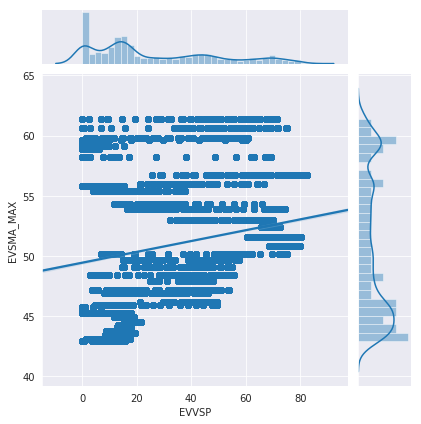

In [22]:
# scatterplot with regression (best fit line)
sns.jointplot(x = "EVVSP", y = "EVSMA_MAX", data = trip_3, kind = "reg")
plt.show()

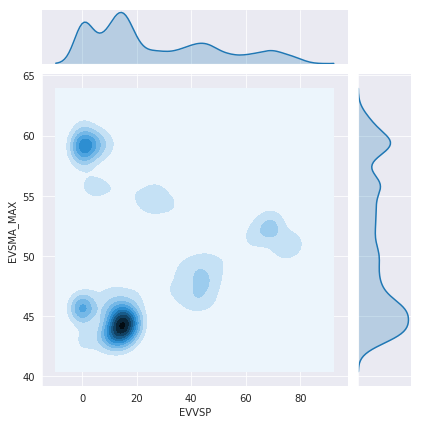

In [23]:
# kernel density plot - a non-parametric way to estimate the PDF
sns.jointplot(x = "EVVSP", y = "EVSMA_MAX", data = trip_3, kind = "kde")
plt.show()

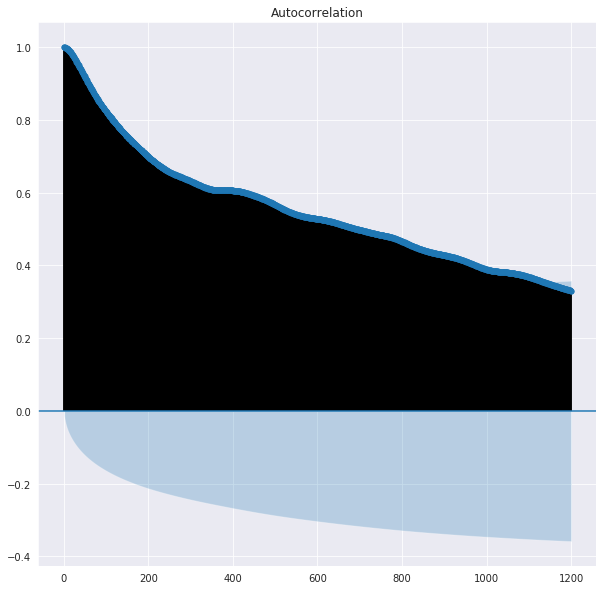

In [24]:
# auto-correlation plot to measure the lags
plot_acf(trip_3["EVVSP"], lags = 1200);

In [25]:
# correlation of Vehicle speed with EVSMA
trip_3["EVVSP"].corr(trip_3["EVSMA_MAX"])

0.17375617379353422

### Repeating the above exercise for different trips - 
- Trip 8

In [26]:
trip_8.head()

,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
55200,55200,DEFREG:352891066263282,8,NaN,77.07207,28.49727,258.0,0,1543205498380,77.072067,28.497351,268.0052,1104361843,5,30.0,1.5,6,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1199,0.0,73,10,0,0,1,0.0,1,13.9,0,49.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.00,0.35,3.99,3.99,85.6,85.6,85.4,85.4,100,22.5,30.5,30.5,30.0,30.0,30.0,9.75,9.75,9.75,240.0,240.0,240.0,1870.0,1820,100.0,100.0,24,205,54,26,185,-48,76,155,61,25,196,-38,512.0,0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28,25,0,28,13.8,0,0.0,35.3,26.8,0,-65532,0,2261,21.0,0,19.0,4.0,65,6,0,3400,3400,3400,138,0,678.0,-790.0,-146.0,NaN
55201,55201,DEFREG:352891066263282,8,NaN,77.07207,28.49727,258.0,100,1543205498480,77.072067,28.497351,268.0052,1104361843,5,30.0,1.5,6,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1199,0.0,73,10,0,0,1,0.0,1,13.9,0,49.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.35,0.35,3.99,3.99,85.6,85.6,85.4,85.4,100,30.5,30.5,30.5,30.0,30.0,30.0,0.25,9.75,9.75,263.5,240.0,240.0,1810.0,1820,100.0,100.0,24,205,54,26,185,-48,76,155,61,25,196,-38,512.0,0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28,25,0,28,13.8,0,0.0,35.3,26.8,0,-65532,0,2261,21.0,0,19.0,4.0,65,6,0,3400,3400,3400,138,0,678.0,-790.0,-146.0,NaN
55202,55202,DEFREG:352891066263282,8,NaN,77.07207,28.49727,258.0,200,1543205498580,77.072067,28.497351,268.0052,1104361843,5,30.0,1.5,6,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1199,0.0,73,10,0,0,1,0.0,1,13.9,0,49.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.35,0.35,3.99,3.99,85.6,85.6,85.4,85.4,100,30.5,30.5,30.5,30.0,30.0,30.0,0.25,9.75,9.75,263.5,240.0,240.0,1810.0,1820,100.0,100.0,24,205,54,26,185,-48,76,155,61,25,196,-38,512.0,0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28,25,0,28,13.8,0,0.0,35.3,26.8,0,-65532,0,2261,21.0,0,19.0,4.0,65,6,0,3400,3400,3400,138,0,678.0,-790.0,-146.0,NaN
55203,55203,DEFREG:352891066263282,8,NaN,77.07207,28.49727,258.0,300,1543205498680,77.072067,28.497351,268.0052,1104361843,5,30.0,1.5,6,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1199,0.0,73,10,0,0,1,0.0,1,13.9,0,49.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.35,0.35,3.99,3.99,85.6,85.6,85.4,85.4,100,30.5,30.5,30.5,30.0,30.0,30.0,0.25,9.75,9.75,263.5,240.0,240.0,1810.0,1820,100.0,100.0,

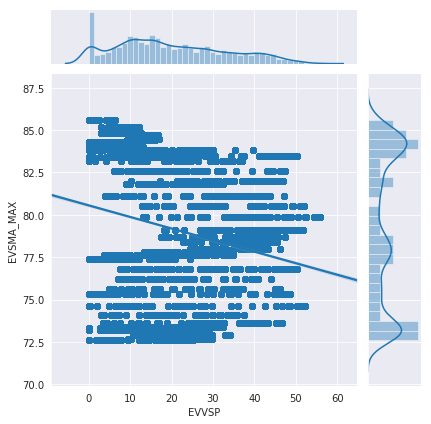

In [27]:
sns.jointplot(x = "EVVSP", y = "EVSMA_MAX", data = trip_8, kind = "reg")
plt.show()

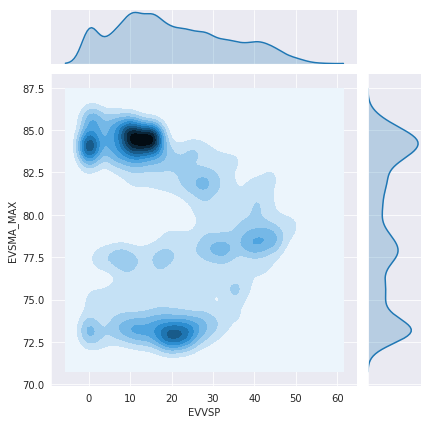

In [28]:
sns.jointplot(x = "EVVSP", y = "EVSMA_MAX", data = trip_8, kind = "kde")
plt.show()

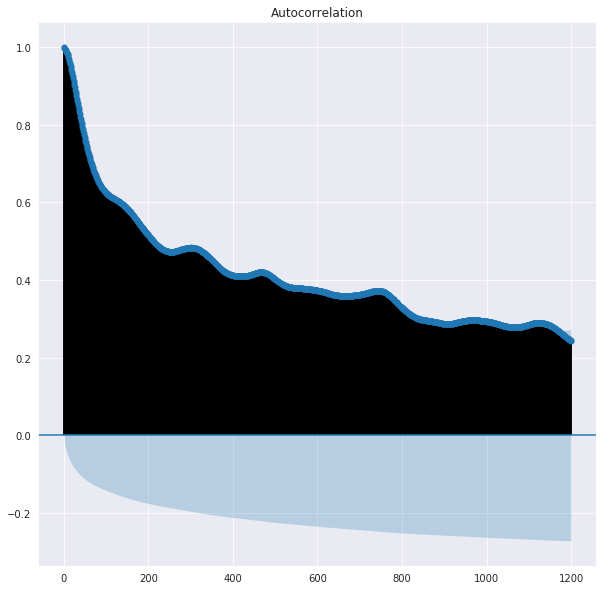

In [29]:
plot_acf(trip_8["EVVSP"], lags = 1200);

In [30]:
# measuring the correlation
trip_8["EVVSP"].corr(trip_8["EVSMA_MAX"])

-0.20763382141408418

### - Trip 35

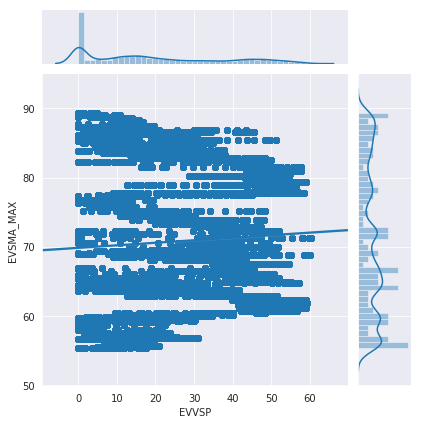

In [31]:
sns.jointplot(x = "EVVSP", y = "EVSMA_MAX", data = trip_35, kind = "reg")
plt.show()

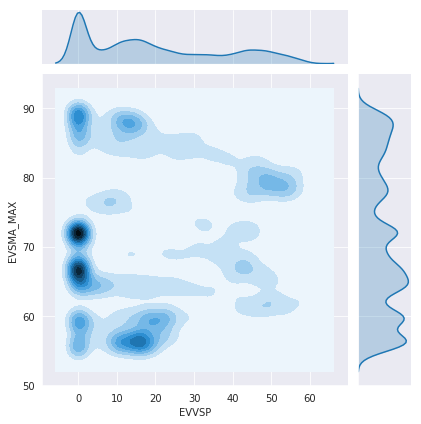

In [32]:
sns.jointplot(x = "EVVSP", y = "EVSMA_MAX", data = trip_35, kind = "kde")
plt.show()

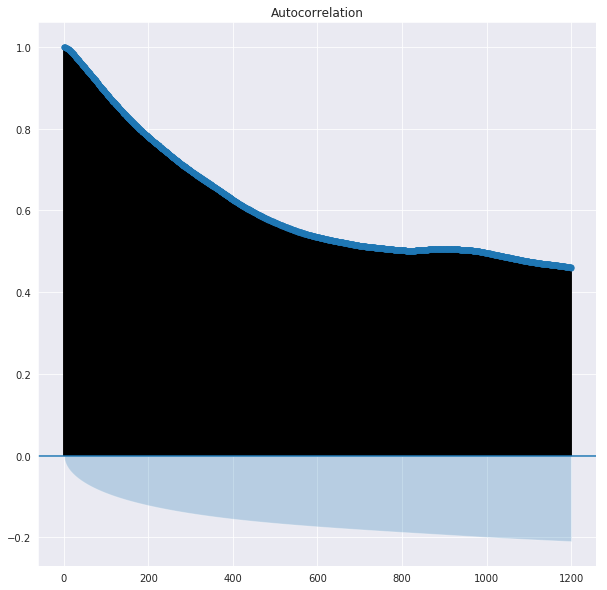

In [33]:
plot_acf(trip_35["EVVSP"], lags = 1200);

In [34]:
trip_35["EVVSP"].corr(trip_35["EVSMA_MAX"])

0.06174330974112475

The correlation among `EVVSP` and `EVSMA_MAX` for different trips is entirely different. So, we can't draw any conclusion from these plots. Below, we will compare the correlation value b/w `EVVSP` and `EVSMA_MAX` for all trips. The DataFrame encodes the vehicle ID and also shows the variance in the EVVSP.

In [35]:
vehicle_name = []
corr_list = []
length = []
variance = []
for i in range(0, data["tp"].nunique()):
    temp_data = data[data["tp"] == i+1]
    v = temp_data.IMEI.iloc[0]
    l = len(temp_data)/10
    corr = temp_data["EVVSP"].corr(temp_data["EVSMA_MAX"])
    corr = round(corr, 2)
    var = temp_data["EVVSP"].var()
    vehicle_name.append(v)
    length.append(l)
    corr_list.append(corr)
    variance.append(var)

EVVSP_corr = pd.DataFrame({
    "Vehicle IMEI": vehicle_name,
    "Trip Length": length,
    "Variance (EVVSP)": variance,
    "Correlation with EVSMA_MAX": corr_list
})

In [36]:
encoder = LabelEncoder()
EVVSP_corr["Vehicle IMEI"] = encoder.fit_transform(EVVSP_corr["Vehicle IMEI"])

In [37]:
EVVSP_corr

,Vehicle IMEI,Trip Length,Variance (EVVSP),Correlation with EVSMA_MAX
0,1,60.0,0.000000,NaN
1,1,2520.0,863.510310,-0.13
2,1,2400.0,526.191504,0.17
3,1,60.0,0.000000,NaN
4,1,60.0,0.000000,NaN
5,1,60.0,0.108427,NaN
6,1,360.0,20.247974,-0.01
7,1,2400.0,178.694064,-0.21
8,1,1200.0,323.097027,-0.54
9,1,1979.8,271.746248,-0.05


Certain values in above graph are NaN because the trips are very small and initial `EVSMA_MAX` and final `EVSMA_MAX` are same.

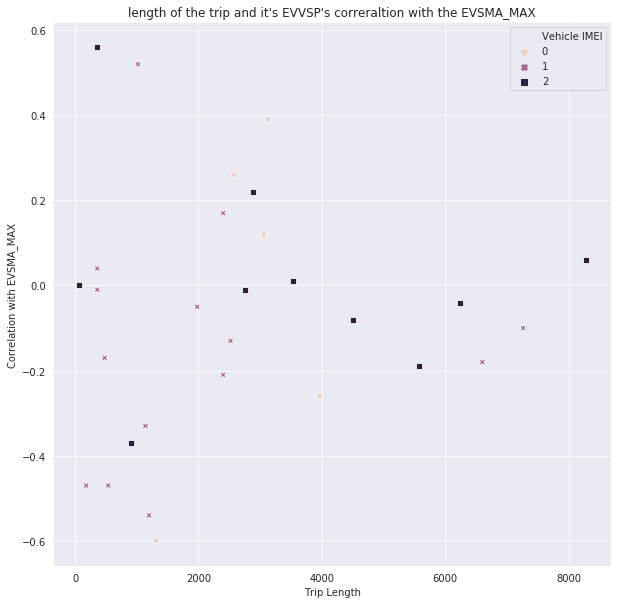

In [38]:
# plotting the above dataframe
sns.scatterplot(x = EVVSP_corr["Trip Length"], y = EVVSP_corr["Correlation with EVSMA_MAX"], 
                hue = EVVSP_corr["Vehicle IMEI"], style = EVVSP_corr["Vehicle IMEI"])
plt.title("length of the trip and it's EVVSP's correraltion with the EVSMA_MAX")
plt.show()

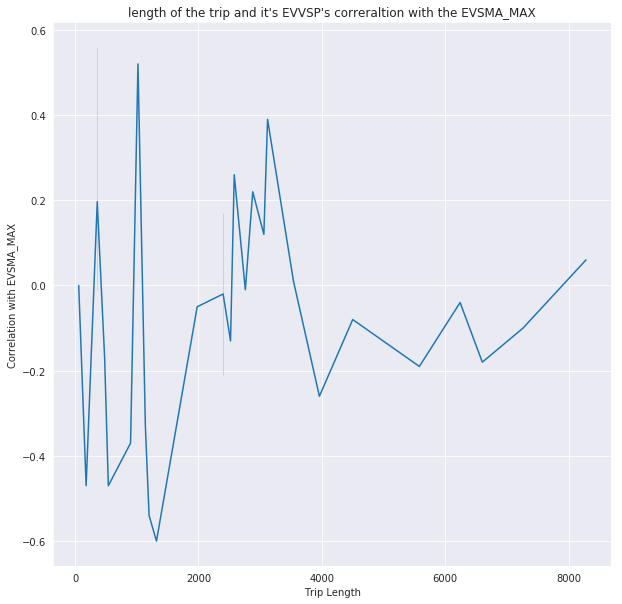

In [39]:
sns.lineplot(x = EVVSP_corr["Trip Length"], y = EVVSP_corr["Correlation with EVSMA_MAX"])
plt.title("length of the trip and it's EVVSP's correraltion with the EVSMA_MAX")
plt.show()

In [40]:
# correlation across all the trips
data["EVVSP"].corr(data["EVSMA_MAX"])

0.046009178996917255

In [41]:
# Variance among EVVSP values across all trips
data["EVVSP"].var()

385.13709664250376

No conclusion can be drawn from above graphs. We will change our approach a bit. Here, we will try to measure correlation of `EVVSP` with the rate of change in `EVSMA_MAX`.

---

# Approach 02

In [42]:
trip_35 = data[data["tp"] == 35]
name = "EVSMA"
trip_35 = trip_35["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)

trip_35['EVSMA_EWMA'] = np.nan

trip_35['EVSMA_EWMA'].iloc[0] = trip_35["EVSMA_MAX"].iloc[0]

In [43]:
for i in range(1, len(trip_35)):
    #print(i)
    #print(trip_35["EVSMA_MAX"].iloc[i] + (trip_35["EVSMA_EWMA"][i-1]*(1-alpha)))
    temp = (trip_35["EVSMA_MAX"].iloc[i]*alpha) + (trip_35["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_35["EVSMA_EWMA"].iloc[i] = temp

In [44]:
#trip_35 = data[data["tp"] == 35]
#trip_35 = trip_35[["EVVSP", "EVSMA_MAX"]].reset_index()
trip_35["EVSMA_Shift"] = trip_35["EVSMA_EWMA"].shift(periods = 1)
trip_35["EVSMA_Shift"].iloc[0] = trip_35["EVSMA_EWMA"].iloc[0]
trip_35["EVSMA_EWMA"] = abs(trip_35["EVSMA_EWMA"] - trip_35["EVSMA_Shift"])

In [45]:
trip_35["EVVSP"] = data[data["tp"] == 35]["EVVSP"]

In [46]:
trip_35["EVVSP_600"] = trip_35["EVVSP"].rolling(600).mean()

In [47]:
temp_data = trip_35[["EVVSP", "EVVSP_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
temp_data.head(5)

,EVVSP,EVVSP_600,EVSMA_MAX,EVSMA_EWMA
496798,0.0,0.425522,89.2,0.000666
496799,0.0,0.425522,89.2,0.000663
496800,0.0,0.425522,89.2,0.000661
496801,0.0,0.425522,89.2,0.000659
496802,0.0,0.425522,89.2,0.000657


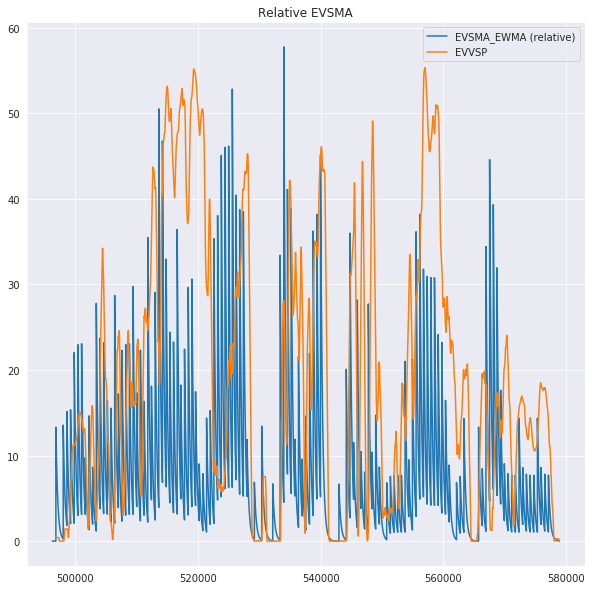

In [48]:
plt.plot(trip_35["EVSMA_EWMA"]*20000, label = "EVSMA_EWMA (relative)")
plt.plot(trip_35["EVVSP_600"], label = "EVVSP")
plt.title("Relative EVSMA")
plt.legend()
plt.show()

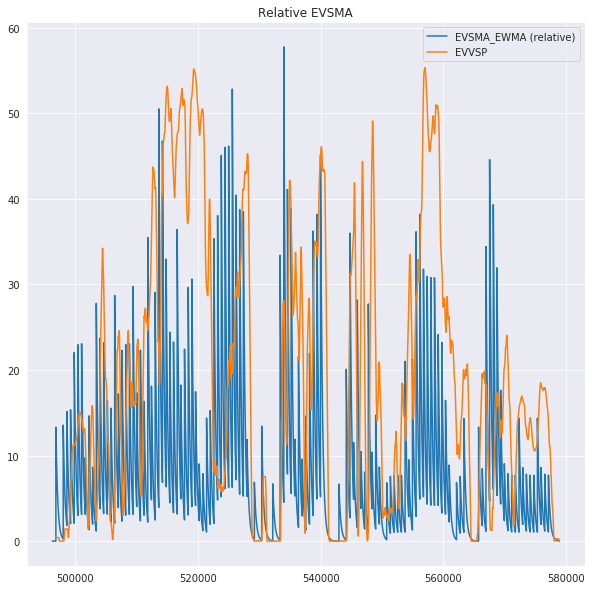

In [49]:
plt.plot(trip_35["EVSMA_EWMA"]*20000, label = "EVSMA_EWMA (relative)")
plt.plot(trip_35["EVVSP_600"], label = "EVVSP")
plt.title("Relative EVSMA")
plt.legend()
plt.show()

In [50]:
temp_data["EVVSP"].corr(temp_data["EVSMA_MAX"])

0.07714407434660246

In [51]:
temp_data["EVVSP_600"].corr(temp_data["EVSMA_EWMA"])

0.30678540392114073

In [52]:
temp_data["EVVSP"].corr(temp_data["EVSMA_EWMA"])

0.36033342736458707

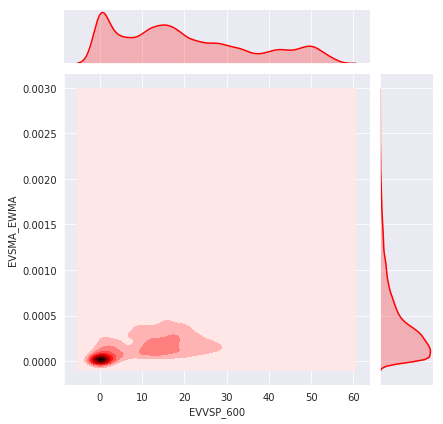

In [53]:
sns.jointplot(x = temp_data["EVVSP_600"], y = temp_data["EVSMA_EWMA"], kind = "kde", color = "red")
plt.show()

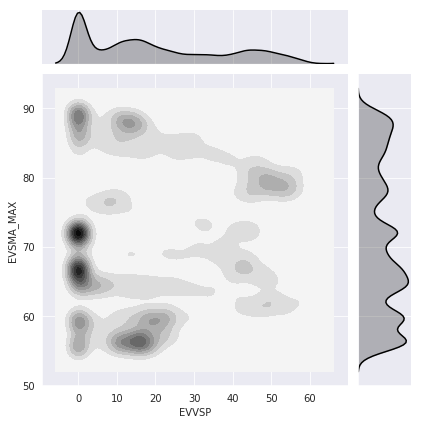

In [54]:
sns.jointplot(x = "EVVSP", y = "EVSMA_MAX", data = trip_35, kind = "kde", color = "black")
plt.show()

---
### Trip 23

In [55]:
trip_23 = data[data["tp"] == 23]

In [56]:
len(trip_23)

72600

In [57]:
trip_23 = trip_23["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_23['EVSMA_EWMA'] = np.nan
trip_23['EVSMA_EWMA'].iloc[0] = trip_23["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_23)):
    temp = (trip_23["EVSMA_MAX"].iloc[i]*alpha) + (trip_23["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_23["EVSMA_EWMA"].iloc[i] = temp
    
trip_23["EVSMA_Shift"] = trip_23["EVSMA_EWMA"].shift(periods = 1)
trip_23["EVSMA_Shift"].iloc[0] = trip_23["EVSMA_EWMA"].iloc[0]
trip_23["EVSMA_EWMA"] = abs(trip_23["EVSMA_EWMA"] - trip_23["EVSMA_Shift"])

In [58]:
trip_23["EVVSP"] = data[data["tp"] == 23]["EVVSP"]
trip_23["EVVSP_600"] = trip_23["EVVSP"].rolling(600).mean()
#trip_23

In [59]:
temp_data_2 = trip_23[["EVVSP", "EVVSP_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
temp_data_2.sample(5)

,EVVSP,EVVSP_600,EVSMA_MAX,EVSMA_EWMA
251564,38.7266,19.320110,69.7,0.001013
251395,15.7266,13.947835,70.2,0.000098
248769,0.0000,14.229166,70.7,0.000272
231974,46.3672,29.064648,80.3,0.000443
224617,0.0000,5.029428,84.5,0.000375


In [60]:
print("Correlation b/w EVVSP and EVSMA_MAX = {}".format(temp_data_2["EVVSP"].corr(temp_data_2["EVSMA_MAX"])))
print("Correlation b/w EVVSP_600 and EVSMA_EWMA = {}".format(temp_data_2["EVVSP_600"].corr(temp_data_2["EVSMA_EWMA"])))
print("Correlation b/w EVVSP and EVSMA_EWMA = {}".format(temp_data_2["EVVSP"].corr(temp_data_2["EVSMA_EWMA"])))

Correlation b/w EVVSP and EVSMA_MAX = -0.09131386726632172
Correlation b/w EVVSP_600 and EVSMA_EWMA = 0.3536109626182868
Correlation b/w EVVSP and EVSMA_EWMA = 0.39532196931996877


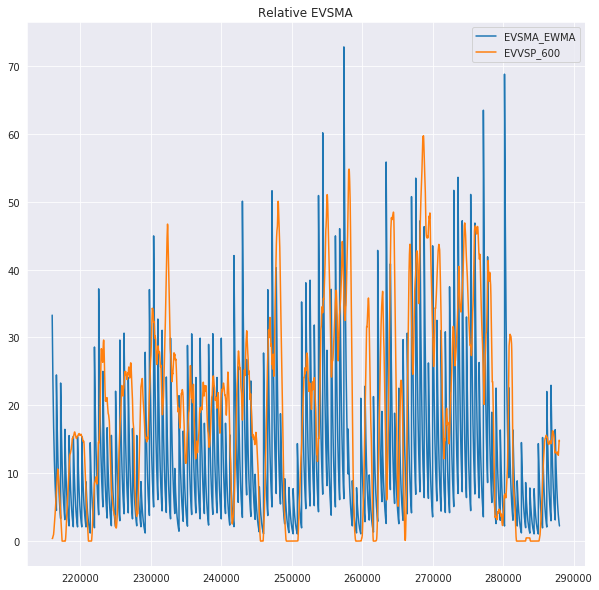

In [61]:
plt.plot(temp_data_2["EVSMA_EWMA"]*20000)
plt.plot(temp_data_2["EVVSP_600"])
plt.title("Relative EVSMA")
plt.legend()
plt.show()

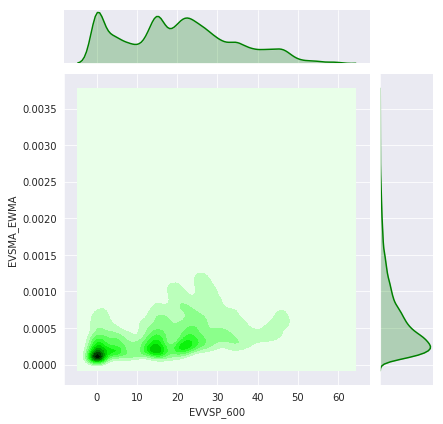

In [62]:
sns.jointplot(x = temp_data_2["EVVSP_600"], y = temp_data_2["EVSMA_EWMA"], kind = "kde", color = "green")
plt.show()

---
### Trip 08

In [63]:
trip_08 = data[data["tp"] == 8]

trip_08 = trip_08["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_08['EVSMA_EWMA'] = np.nan
trip_08['EVSMA_EWMA'].iloc[0] = trip_08["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_08)):
    temp = (trip_08["EVSMA_MAX"].iloc[i]*alpha) + (trip_08["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_08["EVSMA_EWMA"].iloc[i] = temp
    
trip_08["EVSMA_Shift"] = trip_08["EVSMA_EWMA"].shift(periods = 1)
trip_08["EVSMA_Shift"].iloc[0] = trip_08["EVSMA_EWMA"].iloc[0]
trip_08["EVSMA_EWMA"] = abs(trip_08["EVSMA_EWMA"] - trip_08["EVSMA_Shift"])

trip_08["EVVSP"] = data[data["tp"] == 8]["EVVSP"]
trip_08["EVVSP_600"] = trip_08["EVVSP"].rolling(600).mean()

temp_data_3 = trip_08[["EVVSP", "EVVSP_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
temp_data_3.sample(5)

,EVVSP,EVVSP_600,EVSMA_MAX,EVSMA_EWMA
70669,7.7031,7.136458,77.4,0.000162
76749,6.8047,4.524872,73.2,0.000063
67031,29.0000,36.796299,79.1,0.000707
58997,4.7969,11.864170,84.3,0.000203
72872,6.2734,31.510581,75.3,0.000529


In [64]:
print("Correlation b/w EVVSP and EVSMA_MAX = {}".format(temp_data_3["EVVSP"].corr(temp_data_3["EVSMA_MAX"])))
print("Correlation b/w EVVSP_600 and EVSMA_EWMA = {}".format(temp_data_3["EVVSP_600"].corr(temp_data_3["EVSMA_EWMA"])))
print("Correlation b/w EVVSP and EVSMA_EWMA = {}".format(temp_data_3["EVVSP"].corr(temp_data_3["EVSMA_EWMA"])))

Correlation b/w EVVSP and EVSMA_MAX = -0.16474161381263264
Correlation b/w EVVSP_600 and EVSMA_EWMA = 0.33457910304692856
Correlation b/w EVVSP and EVSMA_EWMA = 0.37988384579604034


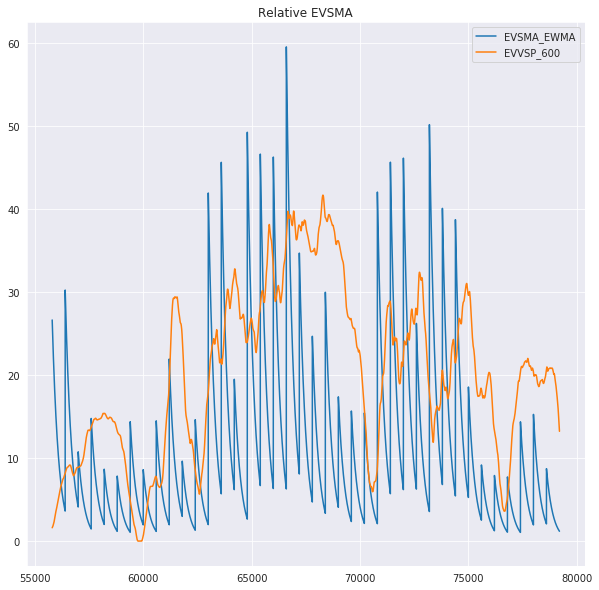

In [65]:
plt.plot(temp_data_3["EVSMA_EWMA"]*20000)
plt.plot(temp_data_3["EVVSP_600"])
plt.title("Relative EVSMA")
plt.legend()
plt.show()

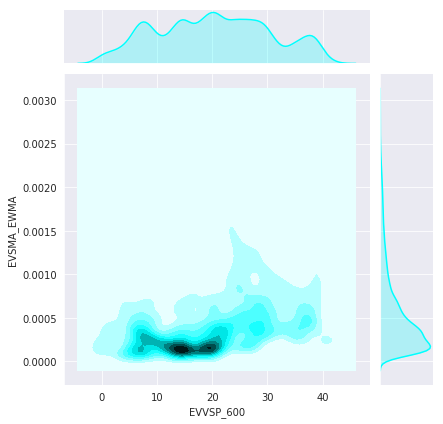

In [66]:
sns.jointplot(x = temp_data_3["EVVSP_600"], y = temp_data_3["EVSMA_EWMA"], kind = "kde", color = "cyan")
plt.show()

In [67]:
def relative_corr(data):
    """
    checking relative correlation for the whole dataset
    """
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVVSP"] = data[data["tp"] == i+1]["EVVSP"]
        trip_t["EVVSP_600"] = trip_t["EVVSP"].rolling(600).mean()
        
        temp_data = trip_t[["EVVSP", "EVVSP_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVVSP"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVVSP_600"].corr(temp_data["EVSMA_EWMA"])
        c3 = temp_data["EVVSP"].corr(temp_data["EVSMA_EWMA"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "VSP & SMA_MAX": corr_1,
        "VSP_600 & SMA_EWMA": corr_2,
        "VSP & SMA_EWMA": corr_3
    })
    
    return SMA_corr

In [68]:
corr_df = relative_corr(data)

In [69]:
corr_df_2 = corr_df[corr_df["Length"] > 20000]

In [70]:
corr_df_2

,Length,VSP & SMA_MAX,VSP_600 & SMA_EWMA,VSP & SMA_EWMA
1,24600,-0.08,0.48,0.51
2,23400,0.16,0.40,0.47
7,23400,-0.16,0.33,0.38
15,65400,-0.17,0.38,0.46
22,72000,-0.09,0.35,0.40
26,30600,0.45,0.66,0.70
27,30000,0.18,0.51,0.55
28,39000,-0.24,0.39,0.45
29,25200,0.29,0.58,0.61
30,55200,-0.17,0.23,0.29


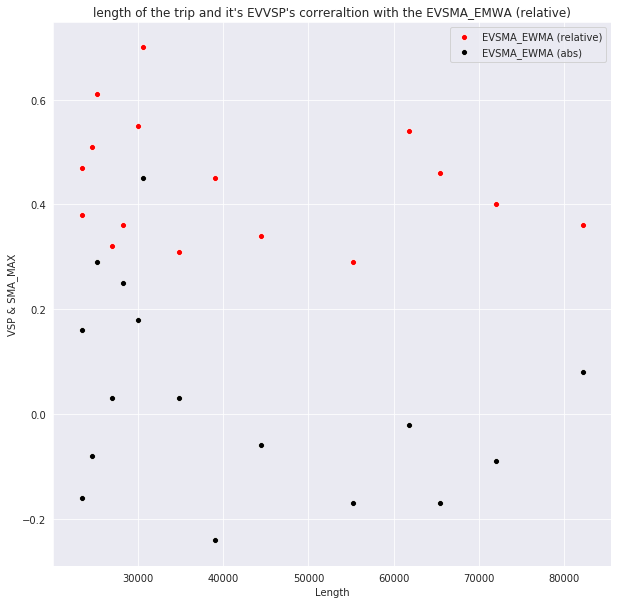

In [71]:
sns.scatterplot(x = corr_df_2["Length"], y = corr_df_2["VSP & SMA_EWMA"], color = "red", label = "EVSMA_EWMA (relative)")
#sns.scatterplot(x = corr_df_2["Length"], y = corr_df_2["VSP_600 & SMA_EWMA"], color = "yellow")
sns.scatterplot(x = corr_df_2["Length"], y = corr_df_2["VSP & SMA_MAX"], color = "black", label = "EVSMA_EWMA (abs)")
plt.title("length of the trip and it's EVVSP's correraltion with the EVSMA_EMWA (relative)")
plt.show()

## Statistical Insights 01 - 
### The correlation b/w the instantaneous speed and *change in EVSMA_EMWA* is more stable on the trips longer than 33 minutes than that with absolute value of *EVSMA_EMWA*. 

---
---
---

## EVODO

In [72]:
vehicle_name = []
corr_list = []
length = []
variance = []
for i in range(0, data["tp"].nunique()):
    temp_data = data[data["tp"] == i+1]
    v = temp_data.IMEI.iloc[0]
    l = len(temp_data)/10
    corr = temp_data["EVODO"].corr(temp_data["EVSMA_MAX"])
    corr = round(corr, 2)
    var = temp_data["EVODO"].var()
    vehicle_name.append(v)
    length.append(l)
    corr_list.append(corr)
    variance.append(var)

EVODO_corr = pd.DataFrame({
    "Vehicle IMEI": vehicle_name,
    "Trip Length": length,
    "Variance (EVODO)": variance,
    "Correlation with EVSMA_MAX": corr_list
})

In [73]:
EVODO_corr_2 = EVODO_corr[EVODO_corr["Trip Length"] > 2000]

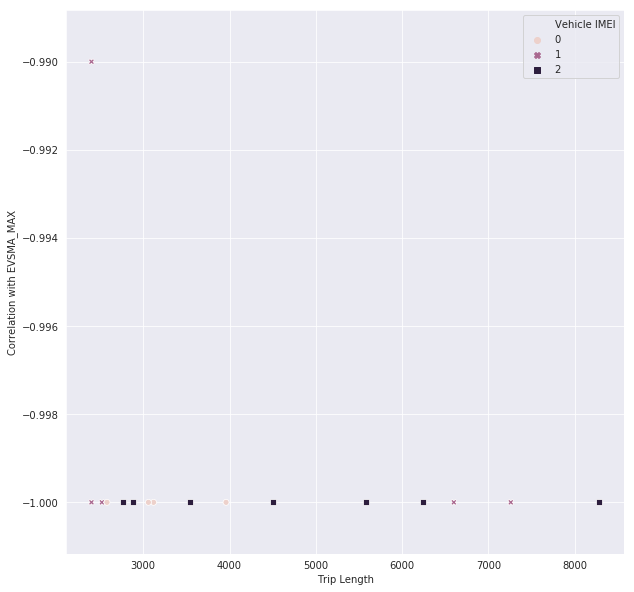

In [74]:
encoder = LabelEncoder()
EVODO_corr_2["Vehicle IMEI"] = encoder.fit_transform(EVODO_corr_2["Vehicle IMEI"])

sns.scatterplot(x = EVODO_corr_2["Trip Length"], y = EVODO_corr_2["Correlation with EVSMA_MAX"], 
                hue = EVODO_corr_2["Vehicle IMEI"], style = EVODO_corr_2["Vehicle IMEI"])
plt.show()

In [75]:
#plt.plot(trip_35["EVODO"])
#plt.show()

In [76]:
data[645596:645599]

,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
645596,209998,DEFREG:358272088699072,37,NaN,77.06322,28.49748,214.91,419800,1546858474060,77.063224,28.497477,217.70355,1061904906,3,50.0,1.1,8,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,781,15.5312,23,11,0,0,1,-16.0,1,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.0,0.0,3.825,3.82,67.3,67.2,66.8,66.8,100,29.0,29.0,29.0,27.5,27.5,27.5,-5.0,-4.0,-5.5,252.75,252.75,252.75,1820.0,1820,100.0,100.0,28,48,0,43,52,0,27,33,0,46,80,26,505.5,-16.1,990,179.4,-180.6,252,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,34,28,0,12,13.9,0,-0.3750,-215.75,0.1,0,-65532,0,7092,19.5,0,16.4,17.0,65,1,0,0,0,0,140,-77,5.0,-948.0,470.0,NaN
645597,209999,DEFREG:358272088699072,37,NaN,77.06322,28.49748,214.91,419900,1546858474160,77.063224,28.497477,217.70355,1061904906,3,50.0,1.1,8,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,781,15.5312,23,11,0,0,1,-16.0,1,13.9,0,58.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.0,0.0,3.825,3.82,67.3,67.2,66.8,66.8,100,29.0,29.0,29.0,27.5,27.5,27.5,-5.0,-4.0,-5.5,252.75,252.75,252.75,1820.0,1820,100.0,100.0,28,48,0,43,52,0,27,33,0,46,80,26,505.5,-16.1,990,179.4,-180.6,252,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,34,28,0,12,13.9,0,-0.3750,-215.75,0.1,0,-65532,0,7092,19.5,0,16.4,17.0,65,1,0,0,0,0,140,-77,5.0,-948.0,470.0,NaN
645598,210000,DEFREG:358272088699072,37,NaN,77.06312,28.49734,209.73,420000,1546858474260,77.063110,28.497346,216.35973,845617700,3,50.0,1.2,7,358272088699072,Trip not started,P,M1_POCEV.0,NaN,1,781,12.8750,23,11,0,0,1,-16.0,1,13.9,0,55.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.0,0.0,3.820,3.82,67.1,67.1,66.7,66.7,100,29.0,29.0,29.0,27.5,27.5,27.5,-5.0,-4.0,-5.5,252.75,252.75,252.75,1820.0,1820,100.0,100.0,28,-49,102,43,1,-50,27,-49,97,46,20,-40,509.0,-10.0,818,179.6,-180.6,252,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,34,28,0,16,13.9,0,-0.9375,-326.50,7.1,0,-65532,0,7092,20.0,0,16.5,17.0,65,1,0,0,0,0,140,-77,-4.0,-944.0,512.0,NaN


---
## EVMCV_MAX - BMS Min Cell Voltage (Max)

In [77]:
trip_35 = data[data["tp"] == 35]

trip_35 = trip_35["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_35['EVSMA_EWMA'] = np.nan
trip_35['EVSMA_EWMA'].iloc[0] = trip_35["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_35)):
    temp = (trip_35["EVSMA_MAX"].iloc[i]*alpha) + (trip_35["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_35["EVSMA_EWMA"].iloc[i] = temp
    
trip_35["EVSMA_Shift"] = trip_35["EVSMA_EWMA"].shift(periods = 1)
trip_35["EVSMA_Shift"].iloc[0] = trip_35["EVSMA_EWMA"].iloc[0]
trip_35["EVSMA_EWMA"] = abs(trip_35["EVSMA_EWMA"] - trip_35["EVSMA_Shift"])

trip_35["EVMCV_MAX"] = data[data["tp"] == 35]["EVMCV_MAX"]
trip_35["EVMCV_MIN"] = data[data["tp"] == 35]["EVMCV_MIN"]
trip_35["EVMCV_Shift"] = trip_35["EVMCV_MAX"].shift(periods = 1)
trip_35["EVMCV_Shift"].iloc[0] = trip_35["EVMCV_MAX"].iloc[0]
trip_35["EVMCV_rel"] = abs(trip_35["EVMCV_MAX"] - trip_35["EVMCV_Shift"])
trip_35["EVMCV_600"] = trip_35["EVMCV_MAX"].rolling(600).mean()

mcv_data = trip_35[["EVMCV_MAX", "EVMCV_MIN", "EVMCV_Shift", "EVMCV_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
mcv_data.sample(5)

,EVMCV_MAX,EVMCV_MIN,EVMCV_Shift,EVMCV_600,EVSMA_MAX,EVSMA_EWMA
529562,3.870,3.870,3.870,3.870000,72.1,0.000102
515464,3.930,3.910,3.930,3.925558,80.2,0.000980
576079,3.745,3.740,3.745,3.740683,55.6,0.000328
532428,3.865,3.865,3.865,3.865000,71.8,0.000155
559428,3.755,3.750,3.755,3.758075,60.4,0.000561


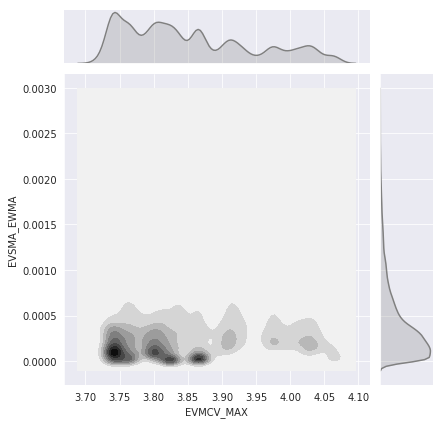

In [78]:
sns.jointplot(x = mcv_data["EVMCV_MAX"], y = mcv_data["EVSMA_EWMA"], kind = "kde", color = "grey")
plt.show()

In [79]:
mcv_data["EVMCV_MAX"].corr(mcv_data["EVSMA_EWMA"])

0.09288503944946444

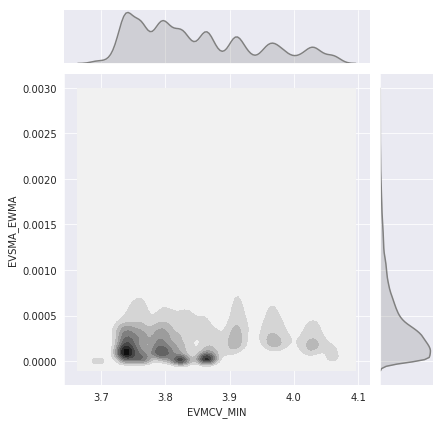

In [80]:
sns.jointplot(x = mcv_data["EVMCV_MIN"], y = mcv_data["EVSMA_EWMA"], kind = "kde", color = "grey")
plt.show()

In [81]:
mcv_data["EVMCV_MIN"].corr(mcv_data["EVSMA_EWMA"])

0.07761180204693809

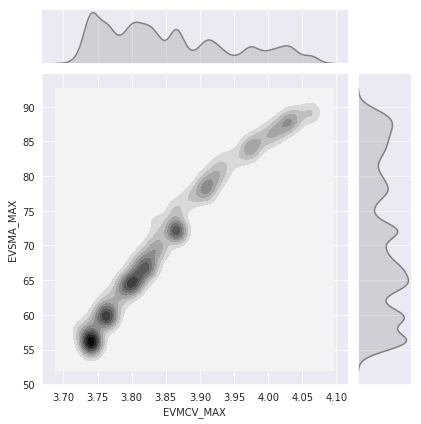

In [82]:
sns.jointplot(x = mcv_data["EVMCV_MAX"], y = mcv_data["EVSMA_MAX"], kind = "kde", color = "grey")
plt.show()

In [83]:
mcv_data["EVMCV_MAX"].corr(mcv_data["EVSMA_MAX"])

0.9859994532412791

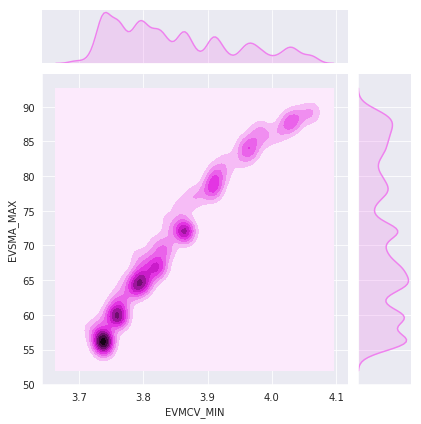

In [84]:
sns.jointplot(x = mcv_data["EVMCV_MIN"], y = mcv_data["EVSMA_MAX"], kind = "kde", color = "violet")
plt.show()

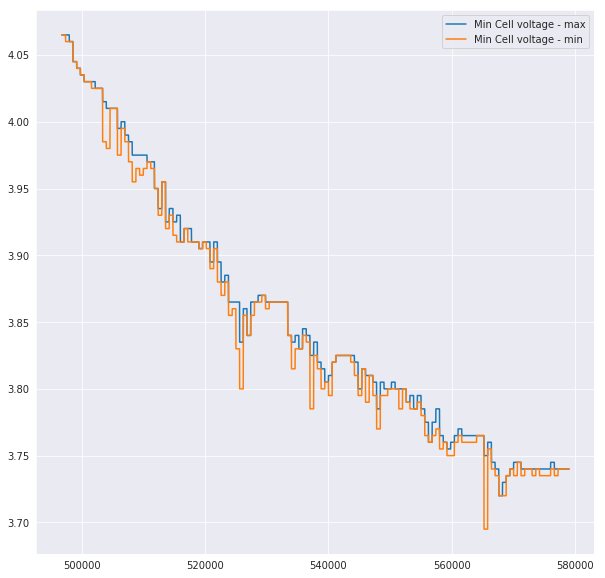

In [85]:
plt.plot(mcv_data["EVMCV_MAX"], label = "Min Cell voltage - max")
plt.plot(mcv_data["EVMCV_MIN"], label = "Min Cell voltage - min")
plt.legend()
plt.show()

In [86]:
len(data[data["tp"] == 36])

62400

In [87]:
trip_36 = data[data["tp"] == 36]

trip_36 = trip_36["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_36['EVSMA_EWMA'] = np.nan
trip_36['EVSMA_EWMA'].iloc[0] = trip_36["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_36)):
    temp = (trip_36["EVSMA_MAX"].iloc[i]*alpha) + (trip_36["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_36["EVSMA_EWMA"].iloc[i] = temp
    
trip_36["EVSMA_Shift"] = trip_36["EVSMA_EWMA"].shift(periods = 1)
trip_36["EVSMA_Shift"].iloc[0] = trip_36["EVSMA_EWMA"].iloc[0]
trip_36["EVSMA_EWMA"] = abs(trip_36["EVSMA_EWMA"] - trip_36["EVSMA_Shift"])

trip_36["EVMCV_MAX"] = data[data["tp"] == 36]["EVMCV_MAX"]
trip_36["EVMCV_600"] = trip_36["EVMCV_MAX"].rolling(600).mean()

mcv_data_2 = trip_36[["EVMCV_MAX", "EVMCV_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
mcv_data_2.sample(5)

,EVMCV_MAX,EVMCV_600,EVSMA_MAX,EVSMA_EWMA
587114,4.035,4.035000,90.2,0.000398
599686,3.955,3.955000,82.1,0.000168
600010,3.955,3.955000,82.1,0.000057
617644,3.910,3.910000,77.4,0.000178
594706,3.990,3.998183,85.7,0.001092


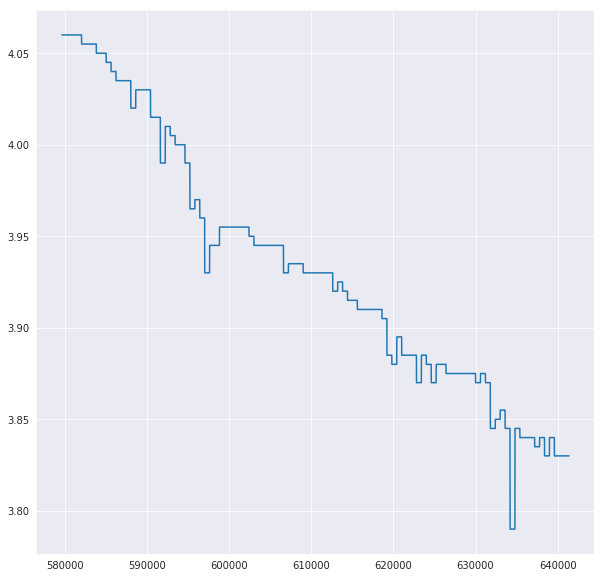

In [88]:
plt.plot(mcv_data_2["EVMCV_MAX"])
plt.show()

In [89]:
mcv_data_2["EVMCV_MAX"].corr(mcv_data_2["EVSMA_MAX"])

0.9915835611588087

---

## EVBOA_AVG - BMS Output Current Avg 

In [90]:
trip_09 = data[data["tp"] == 9]

trip_09 = trip_09["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_09['EVSMA_EWMA'] = np.nan
trip_09['EVSMA_EWMA'].iloc[0] = trip_09["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_09)):
    temp = (trip_09["EVSMA_MAX"].iloc[i]*alpha) + (trip_09["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_09["EVSMA_EWMA"].iloc[i] = temp
    
trip_09["EVSMA_Shift"] = trip_09["EVSMA_EWMA"].shift(periods = 1)
trip_09["EVSMA_Shift"].iloc[0] = trip_09["EVSMA_EWMA"].iloc[0]
trip_09["EVSMA_EWMA"] = abs(trip_09["EVSMA_EWMA"] - trip_09["EVSMA_Shift"])

trip_09["EVBOA_AVG"] = data[data["tp"] == 9]["EVVSP"]
trip_09["EVBOA_600"] = trip_09["EVBOA_AVG"].rolling(600).mean()

boa_data = trip_09[["EVBOA_AVG", "EVBOA_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
boa_data.sample(5)

,EVBOA_AVG,EVBOA_600,EVSMA_MAX,EVSMA_EWMA
89652,57.6875,50.405106,66.5,0.000601
88315,10.1719,11.300830,67.6,0.001248
85682,29.2578,35.495583,70.1,0.000180
86582,8.4922,24.133077,68.8,0.001583
91034,34.5703,56.483396,65.0,0.000504


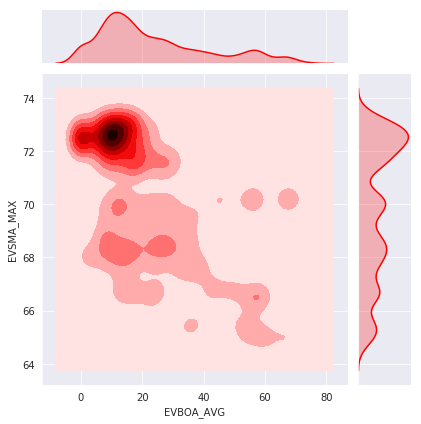

In [91]:
sns.jointplot(x = boa_data["EVBOA_AVG"], y = boa_data["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()

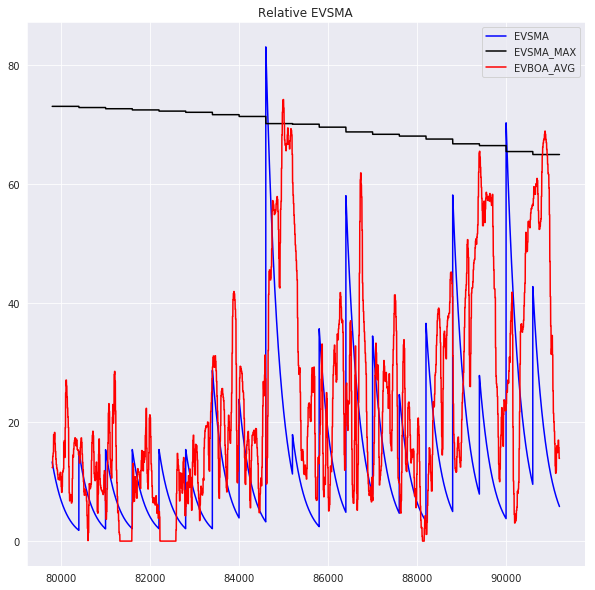

In [92]:
plt.plot(boa_data["EVSMA_EWMA"]*20000, label = "EVSMA", color = "blue")
plt.plot(boa_data["EVSMA_MAX"], label = "EVSMA_MAX", color = "black")
plt.plot(boa_data["EVBOA_AVG"], label = "EVBOA_AVG", color = "red")
plt.title("Relative EVSMA")
plt.legend()
plt.show()

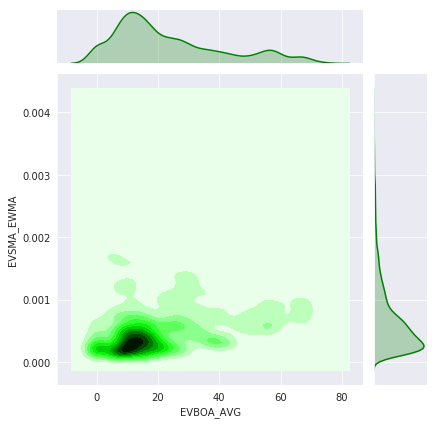

In [93]:
sns.jointplot(x = boa_data["EVBOA_AVG"], y = boa_data["EVSMA_EWMA"], kind = "kde", color = "green")
plt.show()

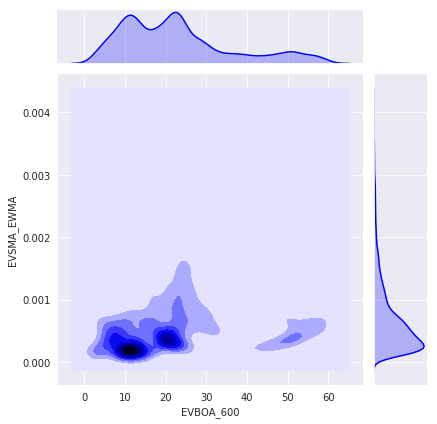

In [94]:
sns.jointplot(x = boa_data["EVBOA_600"], y = boa_data["EVSMA_EWMA"], kind = "kde", color = "blue")
plt.show()

In [95]:
trip_41 = trip_41["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_41['EVSMA_EWMA'] = np.nan
trip_41['EVSMA_EWMA'].iloc[0] = trip_41["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_41)):
    temp = (trip_41["EVSMA_MAX"].iloc[i]*alpha) + (trip_41["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_41["EVSMA_EWMA"].iloc[i] = temp
    
trip_41["EVSMA_Shift"] = trip_41["EVSMA_EWMA"].shift(periods = 1)
trip_41["EVSMA_Shift"].iloc[0] = trip_41["EVSMA_EWMA"].iloc[0]
trip_41["EVSMA_EWMA"] = abs(trip_41["EVSMA_EWMA"] - trip_41["EVSMA_Shift"])

trip_41["EVBOA_AVG"] = data[data["tp"] == 41]["EVVSP"]
trip_41["EVBOA_600"] = trip_41["EVBOA_AVG"].rolling(600).mean()

boa_data = trip_41[["EVBOA_AVG", "EVBOA_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
boa_data.sample(5)

,EVBOA_AVG,EVBOA_600,EVSMA_MAX,EVSMA_EWMA
744288,4.0469,28.730159,84.3,0.000572
748643,39.9609,32.878623,81.4,0.000658
750003,15.8750,21.874369,80.4,0.001146
753850,13.2891,12.809904,78.5,0.000341
742768,31.1484,41.680620,85.5,0.000378


In [96]:
print("Correlation b/w EVBOA and EVSMA_MAX = {}".format(boa_data["EVBOA_AVG"].corr(boa_data["EVSMA_MAX"])))
print("Correlation b/w EVBOA_600 and EVSMA_EWMA = {}".format(boa_data["EVBOA_600"].corr(boa_data["EVSMA_EWMA"])))
print("Correlation b/w EVBOA and EVSMA_EWMA = {}".format(boa_data["EVBOA_AVG"].corr(boa_data["EVSMA_EWMA"])))

Correlation b/w EVBOA and EVSMA_MAX = 0.029166445666503504
Correlation b/w EVBOA_600 and EVSMA_EWMA = 0.27443524945150644
Correlation b/w EVBOA and EVSMA_EWMA = 0.31549606103817374


In [97]:
def relative_corr(data):
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVBOA_AVG"] = data[data["tp"] == i+1]["EVBOA_AVG"]
        trip_t["EVBOA_600"] = trip_t["EVBOA_AVG"].rolling(600).mean()
        
        temp_data = trip_t[["EVBOA_AVG", "EVBOA_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVBOA_AVG"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVBOA_600"].corr(temp_data["EVSMA_EWMA"])
        c3 = temp_data["EVBOA_AVG"].corr(temp_data["EVSMA_EWMA"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "BOA & SMA_MAX": corr_1,
        "BOA_600 & SMA_EWMA": corr_2,
        "BOA & SMA_EWMA": corr_3
    })
    
    return SMA_corr

In [98]:
boa_corr = relative_corr(data)
boa_corr_2 = boa_corr.dropna(axis = 0)

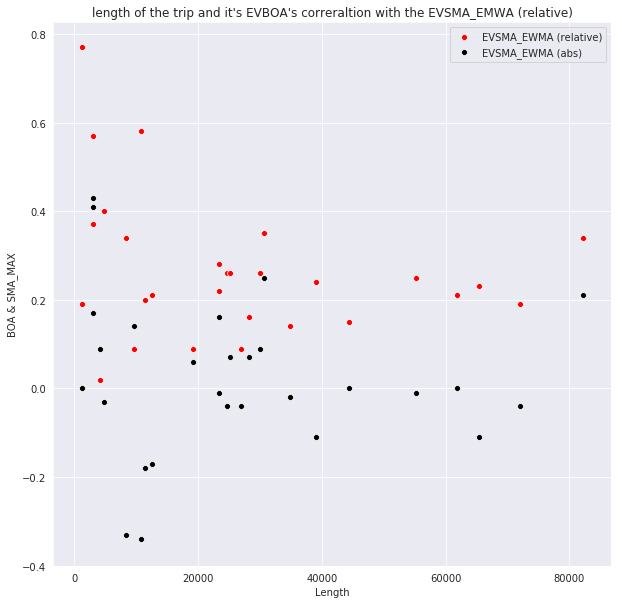

In [99]:
sns.scatterplot(x = boa_corr_2["Length"], 
                y = boa_corr_2["BOA & SMA_EWMA"], 
                color = "red", 
                label = "EVSMA_EWMA (relative)")
sns.scatterplot(x = boa_corr_2["Length"], 
                y = boa_corr_2["BOA & SMA_MAX"], 
                color = "black", 
                label = "EVSMA_EWMA (abs)")
plt.title("length of the trip and it's EVBOA's correraltion with the EVSMA_EMWA (relative)")
plt.show()

In [100]:
print("Mean Correlation of BOA_AVG and EVSMA_EWMA (relative) = {}".format(round(boa_corr_2["BOA & SMA_EWMA"].mean(), 2)))
print("Mean Correlation of BOA_AVG and EVSMA_MAX (abs) = {}".format(round(boa_corr_2["BOA & SMA_MAX"].mean(), 2)))

Mean Correlation of BOA_AVG and EVSMA_EWMA (relative) = 0.27
Mean Correlation of BOA_AVG and EVSMA_MAX (abs) = 0.02


---

## EVCOM_Latest - Coil Maximum Temperature (Latest)

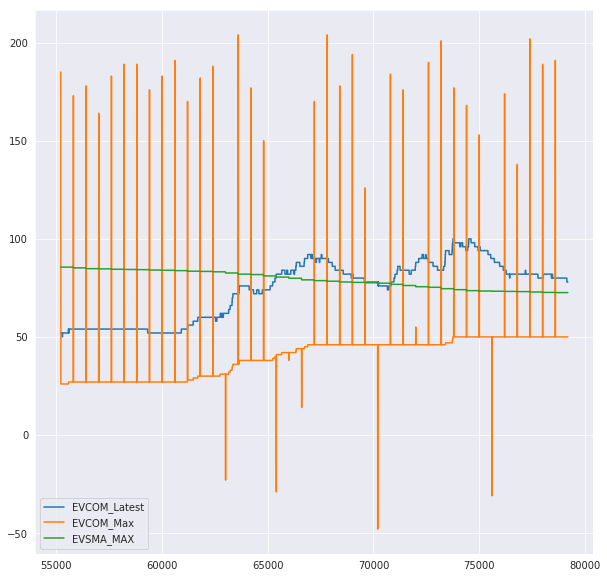

In [101]:
plt.plot(data[data["tp"] == 8]["EVCOM_Latest"]*2, label = "EVCOM_Latest")
plt.plot(data[data["tp"] == 8]["EVCOM_Max"], label = "EVCOM_Max")
plt.plot(data[data["tp"] == 8]["EVSMA_MAX"], label = "EVSMA_MAX")
#plt.plot(data[data["tp"] == 8]["EVBMA_Latest"], label = "EVBMA_Latest")
plt.legend()
plt.show()

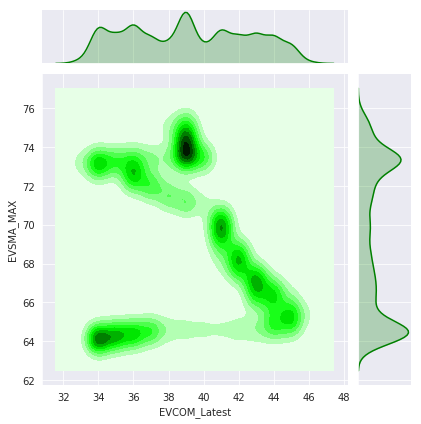

In [102]:
sns.jointplot(x = data[data["tp"] == 30]["EVCOM_Latest"], y = data[data["tp"] == 30]["EVSMA_MAX"], kind = "kde",
             color = "green")
plt.show()

In [103]:
trip_30 = data[data["tp"] == 30]

trip_30 = trip_30["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_30['EVSMA_EWMA'] = np.nan
trip_30['EVSMA_EWMA'].iloc[0] = trip_30["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_30)):
    temp = (trip_30["EVSMA_MAX"].iloc[i]*alpha) + (trip_30["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_30["EVSMA_EWMA"].iloc[i] = temp
    
trip_30["EVSMA_Shift"] = trip_30["EVSMA_EWMA"].shift(periods = 1)
trip_30["EVSMA_Shift"].iloc[0] = trip_30["EVSMA_EWMA"].iloc[0]
trip_30["EVSMA_EWMA"] = abs(trip_30["EVSMA_EWMA"] - trip_30["EVSMA_Shift"])

trip_30["EVCOM_Latest"] = data[data["tp"] == 30]["EVCOM_Latest"]
trip_30["EVCOM_600"] = trip_30["EVCOM_Latest"].rolling(600).mean()

com_data = trip_30[["EVCOM_Latest", "EVCOM_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
com_data.sample(5)

,EVCOM_Latest,EVCOM_600,EVSMA_MAX,EVSMA_EWMA
413867,40,39.683333,73.4,0.000087
417247,34,33.733333,72.9,0.000455
417474,35,34.111667,72.9,0.000214
414718,37,37.913333,73.4,0.000005
428387,45,45.200000,65.4,0.000215


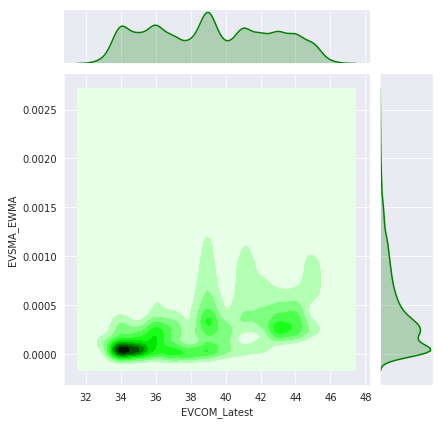

In [104]:
sns.jointplot(x = com_data["EVCOM_Latest"], y = com_data["EVSMA_EWMA"], kind = "kde",
             color = "green")
plt.show()

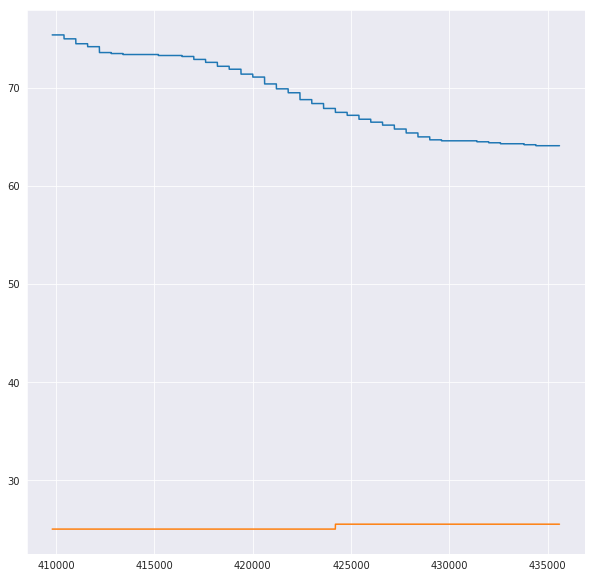

In [105]:
plt.plot()
plt.plot(data[data["tp"] == 30]["EVSMA_MAX"])
plt.plot(data[data["tp"] == 30]["EVBMA_Latest"])
plt.show()

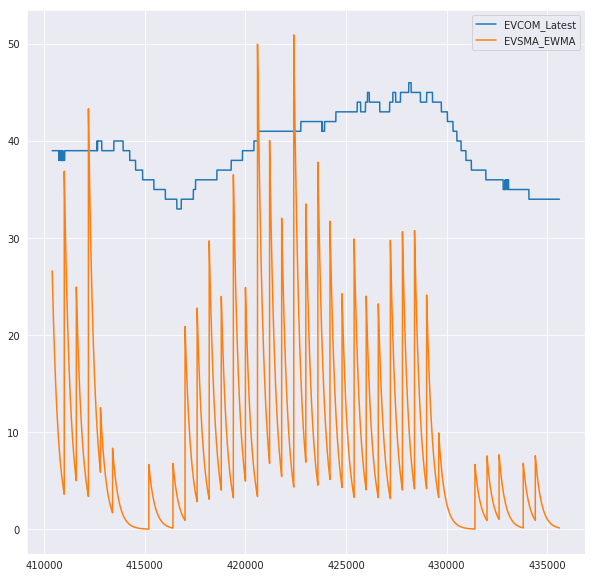

In [106]:
plt.plot(com_data["EVCOM_Latest"], label = "EVCOM_Latest")
plt.plot(com_data["EVSMA_EWMA"]*20000, label = "EVSMA_EWMA")
plt.legend()
plt.show()

In [107]:
def relative_corr(data):
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVCOM_Latest"] = data[data["tp"] == i+1]["EVCOM_Latest"]
        trip_t["EVCOM_600"] = trip_t["EVCOM_Latest"].rolling(600).mean()
        
        temp_data = trip_t[["EVCOM_Latest", "EVCOM_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVCOM_Latest"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVCOM_600"].corr(temp_data["EVSMA_EWMA"])
        c3 = temp_data["EVCOM_Latest"].corr(temp_data["EVSMA_EWMA"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "COM & SMA_MAX": corr_1,
        "COM_600 & SMA_EWMA": corr_2,
        "COM & SMA_EWMA": corr_3
    })
    
    return SMA_corr

In [108]:
com_corr = relative_corr(data)

In [109]:
com_corr.dropna()

,Length,COM & SMA_MAX,COM_600 & SMA_EWMA,COM & SMA_EWMA
1,24600,-0.75,0.25,0.29
2,23400,0.48,0.28,0.37
6,3000,-0.23,-0.52,-0.39
7,23400,-0.85,0.24,0.30
8,11400,-0.82,0.31,0.34
9,19198,-0.38,0.02,0.13
10,9600,0.90,0.26,0.32
12,1200,-0.87,0.02,0.38
14,4200,-0.69,-0.23,-0.24
15,65400,-0.59,0.21,0.27


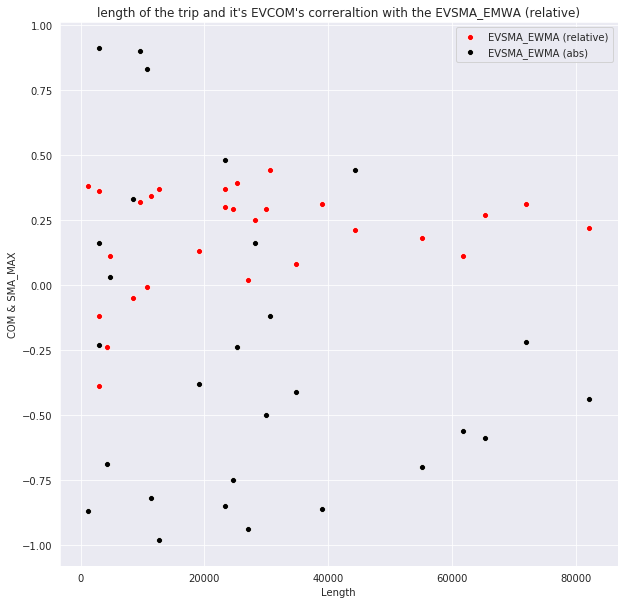

In [110]:
sns.scatterplot(x = com_corr["Length"], 
                y = com_corr["COM & SMA_EWMA"], 
                color = "red", 
                label = "EVSMA_EWMA (relative)")
sns.scatterplot(x = com_corr["Length"], 
                y = com_corr["COM & SMA_MAX"], 
                color = "black", 
                label = "EVSMA_EWMA (abs)")
plt.title("length of the trip and it's EVCOM's correraltion with the EVSMA_EMWA (relative)")
plt.show()

---

## EVBBV - Brake Boost Vacuum

In [111]:
bbv = data[data["tp"] == 32]

In [112]:
bbv_discrete = []
for i in range(10, len(bbv)):
    x = list(bbv["EVBBV"].iloc[i-10:i])
    if len(set(x)) > 1:
        bbv_discrete.append(50)
    else:
        bbv_discrete.append(0)

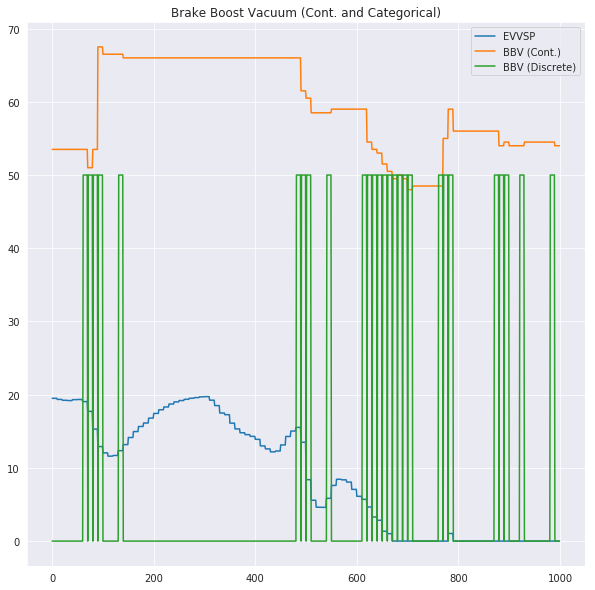

In [113]:
plt.plot(list(bbv["EVVSP"][1000:2000]), label = "EVVSP")
plt.plot(list(bbv["EVBBV"][1000:2000]), label = "BBV (Cont.)")
plt.plot(bbv_discrete[1000:2000], label = "BBV (Discrete)")
plt.legend()
plt.title("Brake Boost Vacuum (Cont. and Categorical)")
plt.show()

#### Insights => The EVBBV can be used as categorical feature to determine whether brake is being pressed or not.

---

## 7. EVBOV_AVG - Battery Side Volatge

In [114]:
trip_42 = data[data["tp"] == 42]

trip_42 = trip_42["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_42['EVSMA_EWMA'] = np.nan
trip_42['EVSMA_EWMA'].iloc[0] = trip_42["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_42)):
    temp = (trip_42["EVSMA_MAX"].iloc[i]*alpha) + (trip_42["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_42["EVSMA_EWMA"].iloc[i] = temp
    
trip_42["EVSMA_Shift"] = trip_42["EVSMA_EWMA"].shift(periods = 1)
trip_42["EVSMA_Shift"].iloc[0] = trip_42["EVSMA_EWMA"].iloc[0]
trip_42["EVSMA_EWMA"] = abs(trip_42["EVSMA_EWMA"] - trip_42["EVSMA_Shift"])

trip_42["EVBOV_AVG"] = data[data["tp"] == 42]["EVBOV_AVG"]
trip_42["EVBOV_600"] = trip_42["EVBOV_AVG"].rolling(600).mean()

bov_data = trip_42[["EVBOV_AVG", "EVBOV_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
bov_data.sample(5)

,EVBOV_AVG,EVBOV_600,EVSMA_MAX,EVSMA_EWMA
768122,253.00,251.470833,67.4,0.001197
781664,246.75,246.874167,56.4,0.000137
777379,249.50,248.637500,60.6,0.000725
760993,255.75,255.491667,73.4,0.000982
782168,247.25,247.083333,56.2,0.000219


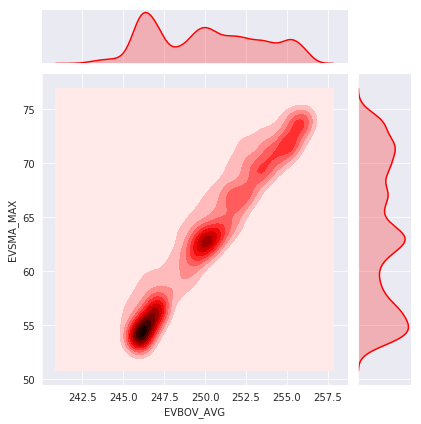

In [115]:
sns.jointplot(x = bov_data["EVBOV_AVG"], y = bov_data["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()

In [116]:
bov_data["EVBOV_AVG"].corr(bov_data["EVSMA_MAX"])

0.9520878955478529

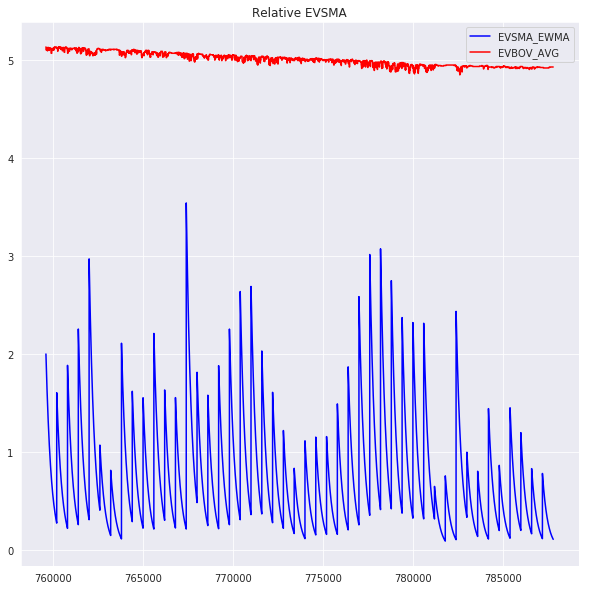

In [117]:
plt.plot(bov_data["EVSMA_EWMA"]*1000, label = "EVSMA_EWMA", color = "blue")
#plt.plot(bov_data["EVSMA_MAX"], label = "EVSMA_MAX", color = "black")
plt.plot(bov_data["EVBOV_AVG"]/50, label = "EVBOV_AVG", color = "red")
plt.title("Relative EVSMA")
plt.legend()
plt.show()

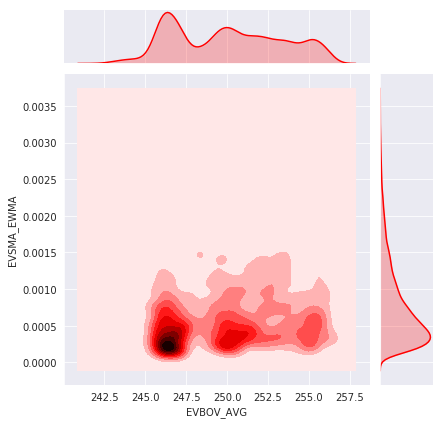

In [118]:
sns.jointplot(x = bov_data["EVBOV_AVG"], y = bov_data["EVSMA_EWMA"], kind = "kde", color = "red")
plt.show()

In [119]:
trip_23 = data[data["tp"] == 23]

trip_23 = trip_23["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_23['EVSMA_EWMA'] = np.nan
trip_23['EVSMA_EWMA'].iloc[0] = trip_23["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_23)):
    temp = (trip_23["EVSMA_MAX"].iloc[i]*alpha) + (trip_23["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_23["EVSMA_EWMA"].iloc[i] = temp
    
trip_23["EVSMA_Shift"] = trip_23["EVSMA_EWMA"].shift(periods = 1)
trip_23["EVSMA_Shift"].iloc[0] = trip_23["EVSMA_EWMA"].iloc[0]
trip_23["EVSMA_EWMA"] = abs(trip_23["EVSMA_EWMA"] - trip_23["EVSMA_Shift"])

trip_23["EVBOV_AVG"] = data[data["tp"] == 23]["EVBOV_AVG"]
trip_23["EVBOV_600"] = trip_23["EVBOV_AVG"].rolling(600).mean()

bov_data_2 = trip_23[["EVBOV_AVG", "EVBOV_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
bov_data_2.sample(5)

,EVBOV_AVG,EVBOV_600,EVSMA_MAX,EVSMA_EWMA
286935,242.75,242.552917,44.8,0.000727
285154,243.25,243.104167,45.6,0.000427
267783,247.25,246.981250,57.7,0.001443
278159,243.50,243.261250,48.5,0.000628
254026,252.00,252.070833,67.6,0.001190


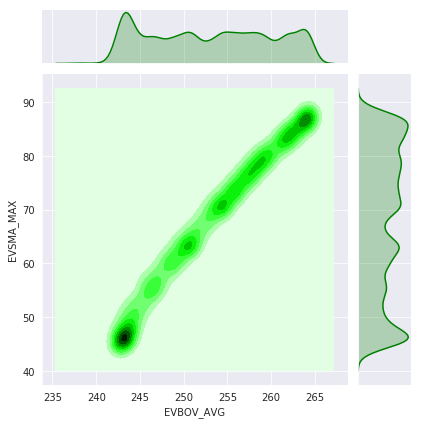

In [120]:
sns.jointplot(x = bov_data_2["EVBOV_AVG"], y = bov_data_2["EVSMA_MAX"], kind = "kde", color = "green")
plt.show()

In [121]:
def BOV_relative_corr(data):
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVBOV_AVG"] = data[data["tp"] == i+1]["EVBOV_AVG"]
        trip_t["EVBOV_600"] = trip_t["EVBOV_AVG"].rolling(600).mean()
        
        temp_data = trip_t[["EVBOV_AVG", "EVBOV_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVBOV_AVG"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVBOV_600"].corr(temp_data["EVSMA_EWMA"])
        c3 = temp_data["EVBOV_AVG"].corr(temp_data["EVSMA_EWMA"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "BOV & SMA_MAX": corr_1,
        "BOV_600 & SMA_EWMA": corr_2,
        "BOV & SMA_EWMA": corr_3
    })
    
    return SMA_corr

In [122]:
BOV_corr = BOV_relative_corr(data)

In [123]:
BOV_corr

,Length,BOV & SMA_MAX,BOV_600 & SMA_EWMA,BOV & SMA_EWMA
0,0,NaN,NaN,NaN
1,24600,0.95,-0.12,-0.15
2,23400,0.81,0.15,0.05
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,3000,-0.36,-0.15,-0.34
7,23400,0.95,-0.10,-0.14
8,11400,0.82,-0.32,-0.38
9,19198,0.84,0.11,0.07


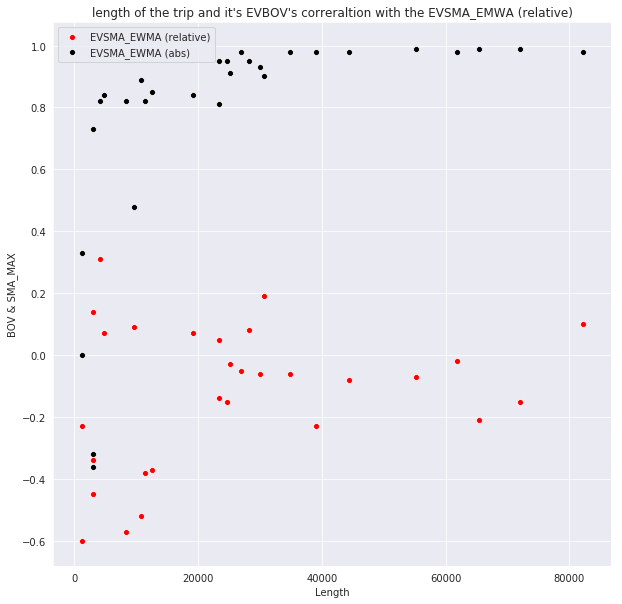

In [124]:
sns.scatterplot(x = BOV_corr["Length"], 
                y = BOV_corr["BOV & SMA_EWMA"], 
                color = "red", 
                label = "EVSMA_EWMA (relative)")
sns.scatterplot(x = BOV_corr["Length"], 
                y = BOV_corr["BOV & SMA_MAX"], 
                color = "black", 
                label = "EVSMA_EWMA (abs)")
plt.title("length of the trip and it's EVBOV's correraltion with the EVSMA_EMWA (relative)")
plt.show()

### Insight => The EVBOV inhibits a strong relationship with the EVSMA_MAX and the correlations goes on getting stronger as the length of the trip increases.

---

## EVIRT_Latest - Invertor Rotor Temperature

In [125]:
trip_31 = data[data["tp"] == 31]

trip_31 = trip_31["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_31['EVSMA_EWMA'] = np.nan
trip_31['EVSMA_EWMA'].iloc[0] = trip_31["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_31)):
    temp = (trip_31["EVSMA_MAX"].iloc[i]*alpha) + (trip_31["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_31["EVSMA_EWMA"].iloc[i] = temp
    
trip_31["EVSMA_Shift"] = trip_31["EVSMA_EWMA"].shift(periods = 1)
trip_31["EVSMA_Shift"].iloc[0] = trip_31["EVSMA_EWMA"].iloc[0]
trip_31["EVSMA_EWMA"] = abs(trip_31["EVSMA_EWMA"] - trip_31["EVSMA_Shift"])

trip_31["EVIRT_Latest"] = data[data["tp"] == 31]["EVIRT_Latest"]
trip_31["EVIRT_600"] = trip_31["EVIRT_Latest"].rolling(600).mean()

IRT_data = trip_31[["EVIRT_Latest", "EVIRT_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
IRT_data.sample(5)

,EVIRT_Latest,EVIRT_600,EVSMA_MAX,EVSMA_EWMA
489092,39,39.991667,48.3,0.001131
444477,14,13.200000,87.0,0.000513
474115,38,38.620000,60.9,0.000790
451681,28,27.840000,79.5,0.000645
476129,37,37.680000,59.7,0.000485


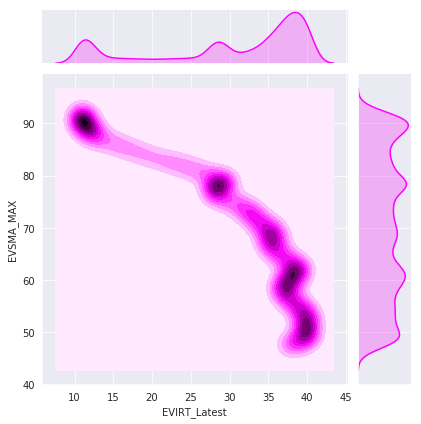

In [126]:
sns.jointplot(x = IRT_data["EVIRT_Latest"], y = IRT_data["EVSMA_MAX"], kind = "kde", color = "magenta")
plt.show()

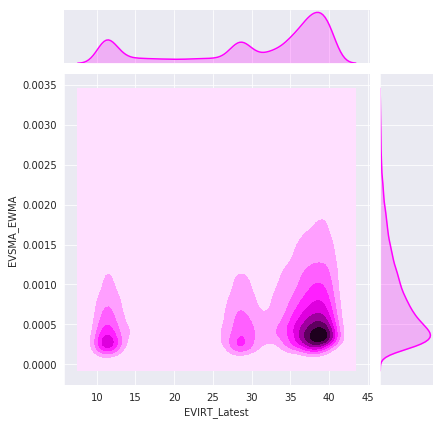

In [127]:
sns.jointplot(x = IRT_data["EVIRT_Latest"], y = IRT_data["EVSMA_EWMA"], kind = "kde", color = "magenta")
plt.show()

In [128]:
trip_36 = data[data["tp"] == 36]

trip_38 = trip_38["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_38['EVSMA_EWMA'] = np.nan
trip_38['EVSMA_EWMA'].iloc[0] = trip_38["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_38)):
    temp = (trip_38["EVSMA_MAX"].iloc[i]*alpha) + (trip_38["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_38["EVSMA_EWMA"].iloc[i] = temp
    
trip_38["EVSMA_Shift"] = trip_38["EVSMA_EWMA"].shift(periods = 1)
trip_38["EVSMA_Shift"].iloc[0] = trip_38["EVSMA_EWMA"].iloc[0]
trip_38["EVSMA_EWMA"] = abs(trip_38["EVSMA_EWMA"] - trip_38["EVSMA_Shift"])

trip_38["EVIRT_Latest"] = data[data["tp"] == 38]["EVIRT_Latest"]
trip_38["EVIRT_600"] = trip_38["EVIRT_Latest"].rolling(600).mean()

IRT_data_2 = trip_38[["EVIRT_Latest", "EVIRT_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
IRT_data_2.sample(5)

,EVIRT_Latest,EVIRT_600,EVSMA_MAX,EVSMA_EWMA
675372,39,39.000000,76.2,0.000124
651544,30,29.595000,89.4,0.000270
667989,40,40.000000,79.3,0.000791
653481,30,30.000000,88.4,0.000526
654254,31,30.061667,88.1,0.000465


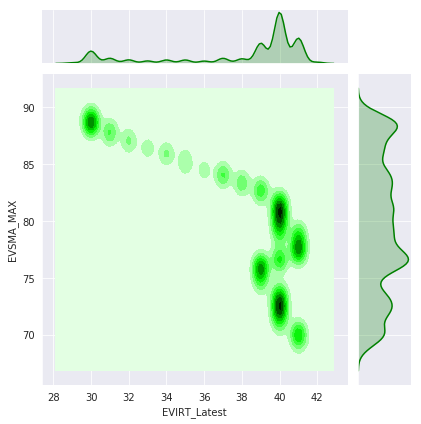

In [129]:
sns.jointplot(x = IRT_data_2["EVIRT_Latest"], y = IRT_data_2["EVSMA_MAX"], kind = "kde", color = "green")
plt.show()

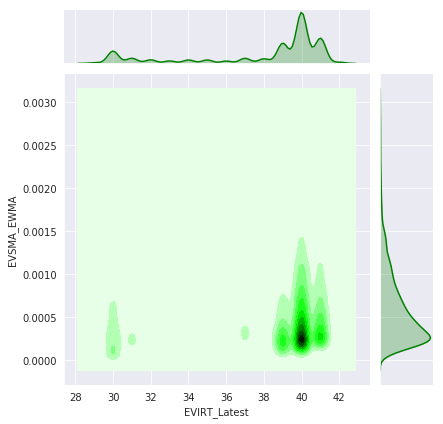

In [130]:
sns.jointplot(x = IRT_data_2["EVIRT_Latest"], y = IRT_data_2["EVSMA_EWMA"], kind = "kde", color = "green")
plt.show()

In [131]:
def IRT_relative_corr(data):
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVIRT_Latest"] = data[data["tp"] == i+1]["EVIRT_Latest"]
        trip_t["EVIRT_600"] = trip_t["EVIRT_Latest"].rolling(600).mean()
        
        temp_data = trip_t[["EVIRT_Latest", "EVIRT_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVIRT_Latest"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVIRT_600"].corr(temp_data["EVSMA_EWMA"])
        c3 = temp_data["EVIRT_Latest"].corr(temp_data["EVSMA_EWMA"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "IRT & SMA_MAX": corr_1,
        "IRT_600 & SMA_EWMA": corr_2,
        "IRT & SMA_EWMA": corr_3
    })
    
    return SMA_corr

In [132]:
IRT_corr = IRT_relative_corr(data)

In [133]:
IRT_corr

,Length,IRT & SMA_MAX,IRT_600 & SMA_EWMA,IRT & SMA_EWMA
0,0,NaN,NaN,NaN
1,24600,-0.96,0.01,0.03
2,23400,-0.76,-0.19,-0.13
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,3000,NaN,NaN,NaN
7,23400,-0.98,0.06,0.07
8,11400,-0.99,0.33,0.33
9,19198,-0.98,-0.18,-0.18


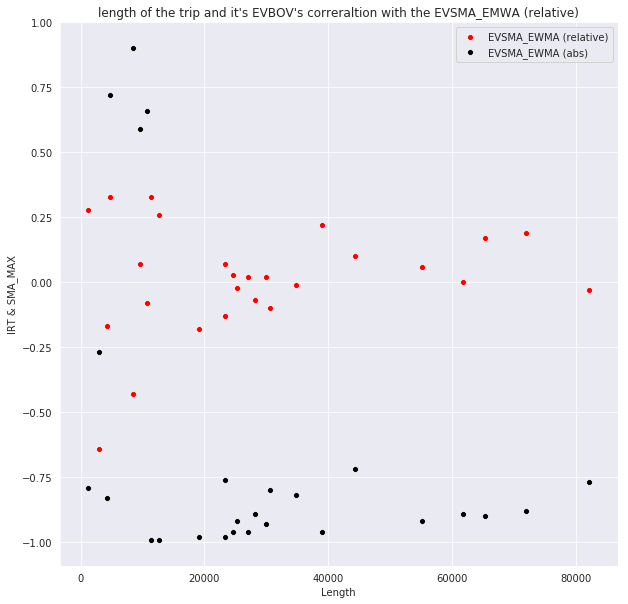

In [134]:
sns.scatterplot(x = IRT_corr["Length"], 
                y = IRT_corr["IRT & SMA_EWMA"], 
                color = "red", 
                label = "EVSMA_EWMA (relative)")
sns.scatterplot(x = IRT_corr["Length"], 
                y = IRT_corr["IRT & SMA_MAX"], 
                color = "black", 
                label = "EVSMA_EWMA (abs)")
plt.title("length of the trip and it's EVBOV's correraltion with the EVSMA_EMWA (relative)")
plt.show()

### Insight - EVIRT has a very high negative correlation with the absolute value of EVSMA. As the trip gets longer, EVIRT gets plateaued around 40-45, there by becoming independent of the EVSMA. 

---

## EVMGS - MG1 Speed Actual

In [135]:
trip_27 = data[data["tp"] == 27]

trip_27 = trip_27["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_27['EVSMA_EWMA'] = np.nan
trip_27['EVSMA_EWMA'].iloc[0] = trip_27["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_27)):
    temp = (trip_27["EVSMA_MAX"].iloc[i]*alpha) + (trip_27["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_27["EVSMA_EWMA"].iloc[i] = temp
    
trip_27["EVSMA_Shift"] = trip_27["EVSMA_EWMA"].shift(periods = 1)
trip_27["EVSMA_Shift"].iloc[0] = trip_27["EVSMA_EWMA"].iloc[0]
trip_27["EVSMA_EWMA"] = abs(trip_27["EVSMA_EWMA"] - trip_27["EVSMA_Shift"])

trip_27["EVMGS"] = data[data["tp"] == 27]["EVMGS"]
trip_27["EVMGS_600"] = trip_27["EVMGS"].rolling(600).mean()

MGS_data = trip_27[["EVMGS", "EVMGS_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
MGS_data.sample(5)

,EVMGS,EVMGS_600,EVSMA_MAX,EVSMA_EWMA
337755,0,0.016667,75.0,7.034366e-06
327935,38,689.430000,75.2,1.422470e-04
323598,3676,1237.498333,77.5,7.200553e-04
320207,3992,4062.650000,79.2,5.072372e-04
334172,0,-0.016667,75.1,1.217407e-07


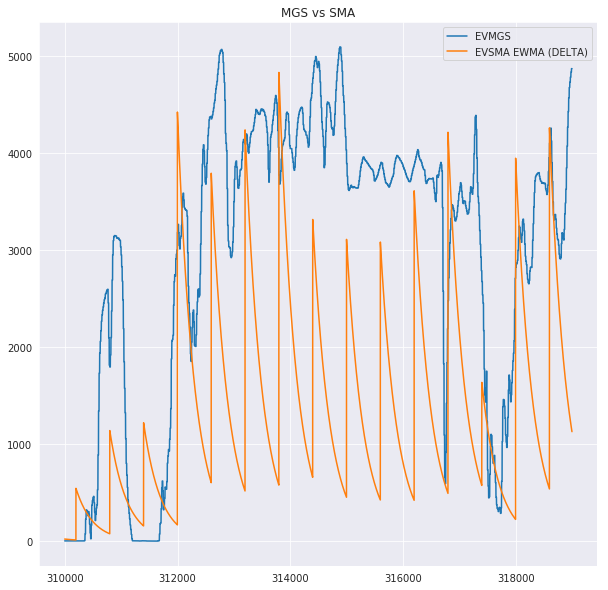

In [136]:
plt.plot(MGS_data["EVMGS"][1000:10000], label = "EVMGS")
#plt.plot(MGS_data["EVMGS_600"], label = "EVMGS_600")
#plt.plot(MGS_data["EVSMA_MAX"]*40, label = "EVSMA") # multiplication done for scaling only
plt.plot(MGS_data["EVSMA_EWMA"][1000:10000]*1600000, label = "EVSMA EWMA (DELTA)")
plt.title("MGS vs SMA")
plt.legend()
plt.show()

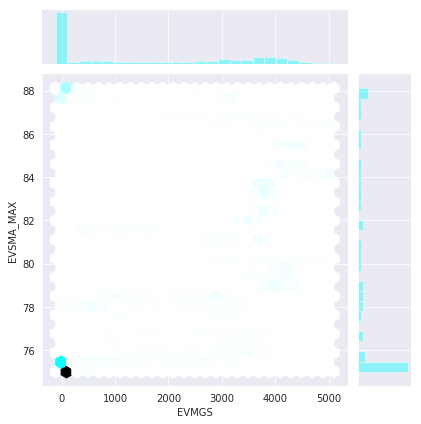

In [137]:
sns.jointplot(x = MGS_data["EVMGS"], y = MGS_data["EVSMA_MAX"], kind = "hex", color = "cyan")
plt.show()

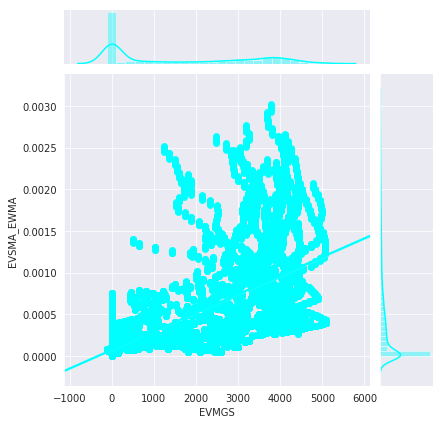

In [138]:
sns.jointplot(x = MGS_data["EVMGS"], y = MGS_data["EVSMA_EWMA"], kind = "reg", color = "cyan")
plt.show()

In [139]:
trip_39 = data[data["tp"] == 39]

trip_39 = trip_39["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_39['EVSMA_EWMA'] = np.nan
trip_39['EVSMA_EWMA'].iloc[0] = trip_39["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_39)):
    temp = (trip_39["EVSMA_MAX"].iloc[i]*alpha) + (trip_39["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_39["EVSMA_EWMA"].iloc[i] = temp
    
trip_39["EVSMA_Shift"] = trip_39["EVSMA_EWMA"].shift(periods = 1)
trip_39["EVSMA_Shift"].iloc[0] = trip_39["EVSMA_EWMA"].iloc[0]
trip_39["EVSMA_EWMA"] = abs(trip_39["EVSMA_EWMA"] - trip_39["EVSMA_Shift"])

trip_39["EVMGS"] = data[data["tp"] == 39]["EVMGS"]
trip_39["EVMGS_600"] = trip_39["EVMGS"].rolling(600).mean()

MGS_data_2 = trip_39[["EVMGS", "EVMGS_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
MGS_data_2.sample(5)

,EVMGS,EVMGS_600,EVSMA_MAX,EVSMA_EWMA
696061,685,1429.916667,63.8,0.000938
710146,15,250.093333,56.6,0.000139
702759,123,1642.630000,59.5,0.001129
702639,481,2383.966667,59.5,0.001684
698585,463,270.913333,62.5,0.000450


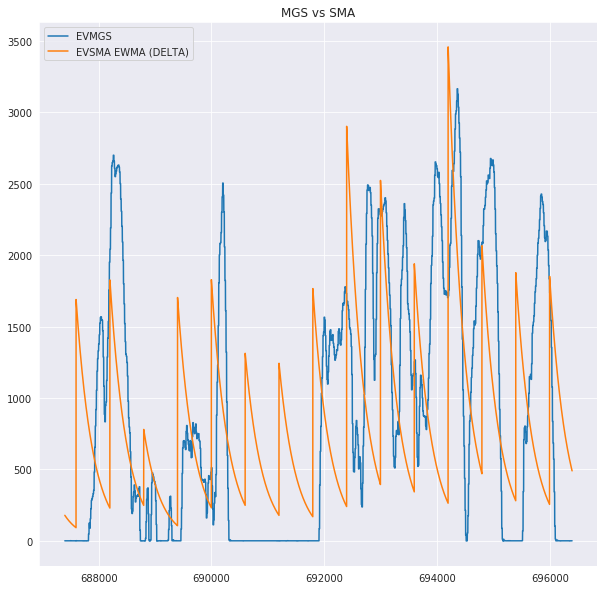

In [140]:
plt.plot(MGS_data_2["EVMGS"][1000:10000], label = "EVMGS")
#plt.plot(MGS_data["EVMGS_600"], label = "EVMGS_600")
#plt.plot(MGS_data["EVSMA_MAX"]*40, label = "EVSMA") # multiplication done for scaling only
plt.plot(MGS_data_2["EVSMA_EWMA"][1000:10000]*1600000, label = "EVSMA EWMA (DELTA)")
plt.title("MGS vs SMA")
plt.legend()
plt.show()

In [168]:
def MGS_relative_corr(data):
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVMGS"] = data[data["tp"] == i+1]["EVMGS"]
        trip_t["EVVSP"] = data[data["tp"] == i+1]["EVVSP"]
        
        temp_data = trip_t[["EVMGS", "EVVSP", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVMGS"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVVSP"].corr(temp_data["EVMGS"])
        c3 = temp_data["EVMGS"].corr(temp_data["EVSMA_EWMA"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "MGS & SMA_MAX": corr_1,
        "VSP & MGS": corr_2,
        "MGS & SMA_EWMA": corr_3
    })
    
    return SMA_corr

In [169]:
MGS_corr = MGS_relative_corr(data)

In [170]:
MGS_corr

,Length,MGS & SMA_MAX,VSP & MGS,MGS & SMA_EWMA
0,0,NaN,NaN,NaN
1,24600,-0.08,1.00,0.51
2,23400,0.16,1.00,0.47
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,3000,0.26,1.00,0.23
7,23400,-0.16,1.00,0.38
8,11400,-0.52,1.00,0.29
9,19198,0.03,1.00,0.16


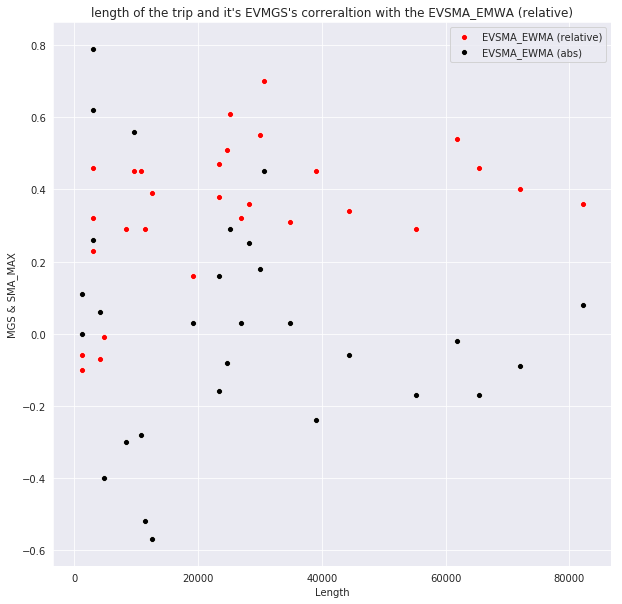

In [167]:
sns.scatterplot(x = MGS_corr["Length"], 
                y = MGS_corr["MGS & SMA_EWMA"], 
                color = "red", 
                label = "EVSMA_EWMA (relative)")
sns.scatterplot(x = MGS_corr["Length"], 
                y = MGS_corr["MGS & SMA_MAX"], 
                color = "black", 
                label = "EVSMA_EWMA (abs)")
plt.title("length of the trip and it's EVMGS's correraltion with the EVSMA_EMWA (relative)")
plt.show()

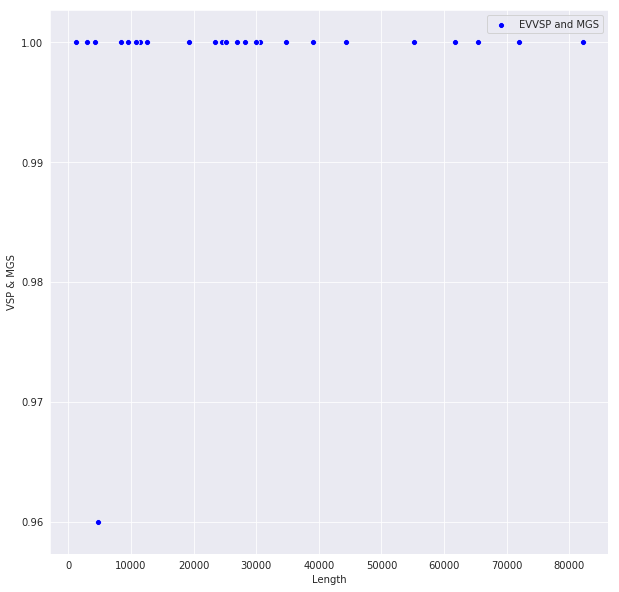

In [173]:
sns.scatterplot(x = MGS_corr["Length"], 
                y = MGS_corr["VSP & MGS"], 
                color = "blue", 
                label = "EVVSP and MGS")
plt.show()

### Insight => The Correlation analysis of MG1 motor Speed with EVSMA is not yielding any good result. The results are quite varied. More analysis is required for this feature. EVVSP has linear relationship with MGS, so this feature can be dropped

---

## EVDI1 - DDC INV Temperature 1

In [145]:
trip_2 = data[data["tp"] == 2]

trip_2 = trip_2["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_2['EVSMA_EWMA'] = np.nan
trip_2['EVSMA_EWMA'].iloc[0] = trip_2["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_2)):
    temp = (trip_2["EVSMA_MAX"].iloc[i]*alpha) + (trip_2["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_2["EVSMA_EWMA"].iloc[i] = temp
    
trip_2["EVSMA_Shift"] = trip_2["EVSMA_EWMA"].shift(periods = 1)
trip_2["EVSMA_Shift"].iloc[0] = trip_2["EVSMA_EWMA"].iloc[0]
trip_2["EVSMA_EWMA"] = abs(trip_2["EVSMA_EWMA"] - trip_2["EVSMA_Shift"])

trip_2["EVDI1"] = data[data["tp"] == 2]["EVDI1"]
trip_2["EVDI1_600"] = trip_2["EVDI1"].rolling(600).mean()

DI1_data = trip_2[["EVDI1", "EVDI1_600", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
DI1_data.sample(5)

,EVDI1,EVDI1_600,EVSMA_MAX,EVSMA_EWMA
6056,23,22.895,85.2,0.002291
14435,25,25.000,72.5,0.002608
7853,23,23.000,82.7,0.002859
19871,27,27.000,69.0,0.000602
7673,23,23.000,83.6,0.000635


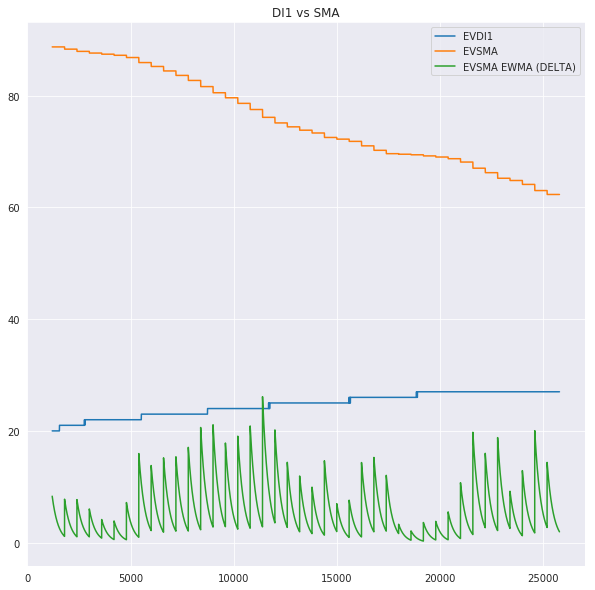

In [146]:
plt.plot(DI1_data["EVDI1"], label = "EVDI1")
#plt.plot(DI1_data["EVDI1_600"], label = "EVDI1_600")
plt.plot(DI1_data["EVSMA_MAX"], label = "EVSMA") # multiplication done for scaling only
plt.plot(DI1_data["EVSMA_EWMA"]*5000, label = "EVSMA EWMA (DELTA)")
plt.title("DI1 vs SMA")
plt.legend()
plt.show()

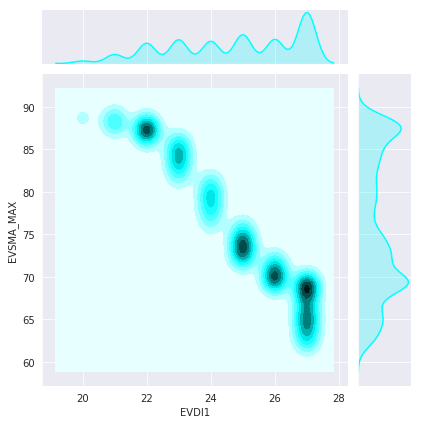

In [147]:
sns.jointplot(x = DI1_data["EVDI1"], y = DI1_data["EVSMA_MAX"], kind = "kde", color = "cyan")
plt.show()

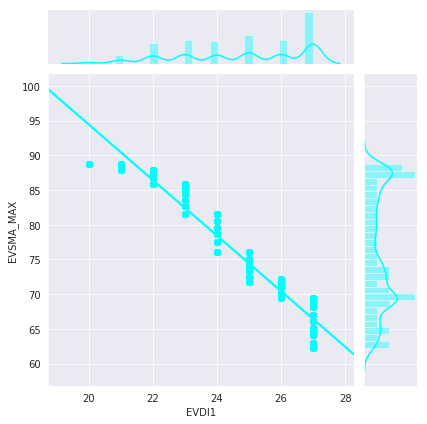

In [148]:
sns.jointplot(x = DI1_data["EVDI1"], y = DI1_data["EVSMA_MAX"], kind = "reg", color = "cyan")
plt.show()

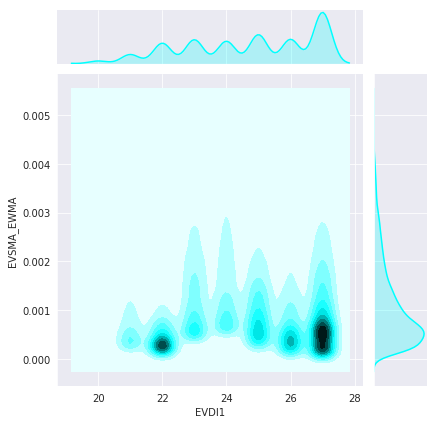

In [149]:
sns.jointplot(x = DI1_data["EVDI1"], y = DI1_data["EVSMA_EWMA"], kind = "kde", color = "cyan")
plt.show()

In [150]:
trip_16 = data[data["tp"] == 16]

trip_16 = trip_16["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_16['EVSMA_EWMA'] = np.nan
trip_16['EVSMA_EWMA'].iloc[0] = trip_16["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_16)):
    temp = (trip_16["EVSMA_MAX"].iloc[i]*alpha) + (trip_16["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_16["EVSMA_EWMA"].iloc[i] = temp
    
trip_16["EVSMA_Shift"] = trip_16["EVSMA_EWMA"].shift(periods = 1)
trip_16["EVSMA_Shift"].iloc[0] = trip_16["EVSMA_EWMA"].iloc[0]
trip_16["EVSMA_EWMA"] = abs(trip_16["EVSMA_EWMA"] - trip_16["EVSMA_Shift"])

trip_16["EVDI1"] = data[data["tp"] == 16]["EVDI1"]
trip_16["EVDI2"] = data[data["tp"] == 16]["EVDI2"]

DI1_data_2 = trip_16[["EVDI1", "EVDI2", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
DI1_data_2.sample(5)

,EVDI1,EVDI2,EVSMA_MAX,EVSMA_EWMA
172749,38,40,71.6,0.000218
150839,40,41,83.0,0.000175
135045,36,36,90.0,0.000040
168021,39,41,74.5,0.001686
157659,39,41,79.0,0.000170


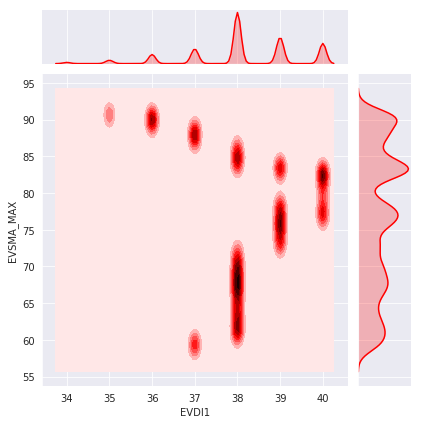

In [153]:
sns.jointplot(x = DI1_data_2["EVDI1"], y = DI1_data_2["EVSMA_MAX"], kind = "kde", color = "RED")
plt.show()

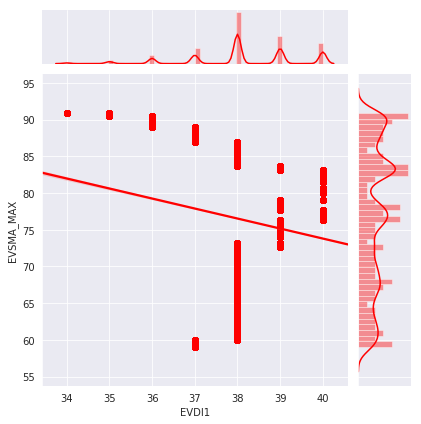

In [154]:
sns.jointplot(x = DI1_data_2["EVDI1"], y = DI1_data_2["EVSMA_MAX"], kind = "reg", color = "red")
plt.show()

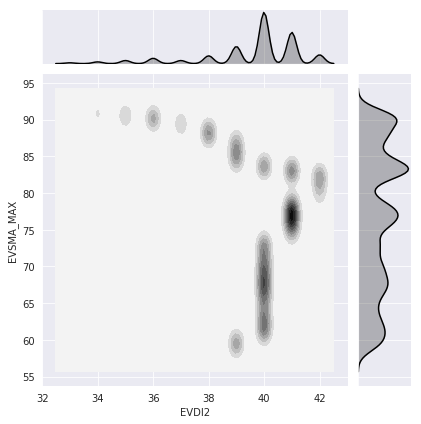

In [155]:
sns.jointplot(x = DI1_data_2["EVDI2"], y = DI1_data_2["EVSMA_MAX"], kind = "kde", color = "black")
plt.show()

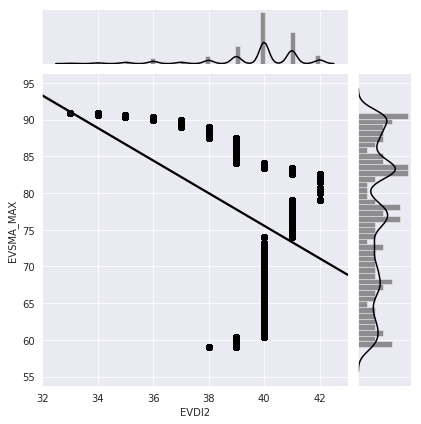

In [156]:
sns.jointplot(x = DI1_data_2["EVDI2"], y = DI1_data_2["EVSMA_MAX"], kind = "reg", color = "black")
plt.show()

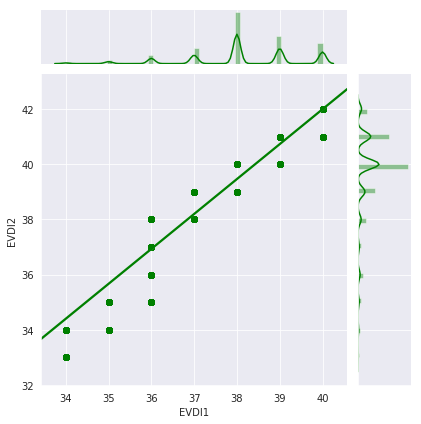

In [157]:
sns.jointplot(x = DI1_data_2["EVDI1"], y = DI1_data_2["EVDI2"], kind = "reg", color = "green")
plt.show()

In [158]:
def DI_relative_corr(data):
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVDI1"] = data[data["tp"] == i+1]["EVDI1"]
        trip_t["EVDI2"] = data[data["tp"] == i+1]["EVDI2"]
        
        temp_data = trip_t[["EVDI1", "EVDI2", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVDI1"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVDI2"].corr(temp_data["EVSMA_MAX"])
        c3 = temp_data["EVDI1"].corr(temp_data["EVDI2"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "DI1 & SMA_MAX": corr_1,
        "DI2 & SMA_MAX": corr_2,
        "DI1 & DI2": corr_3
    })
    
    return SMA_corr

In [159]:
DI_corr = DI_relative_corr(data)

In [160]:
DI_corr.dropna()

,Length,DI1 & SMA_MAX,DI2 & SMA_MAX,DI1 & DI2
1,24600,-0.97,-0.95,0.97
2,23400,-0.02,-0.56,0.62
6,3000,-0.61,-0.92,0.71
7,23400,-0.92,-0.97,0.89
8,11400,-0.83,-0.90,0.94
9,19198,-0.67,-0.89,0.86
10,9600,0.26,-0.76,0.20
12,1200,-0.60,-0.66,0.62
15,65400,-0.18,-0.40,0.93
19,10800,-0.73,-0.96,0.79


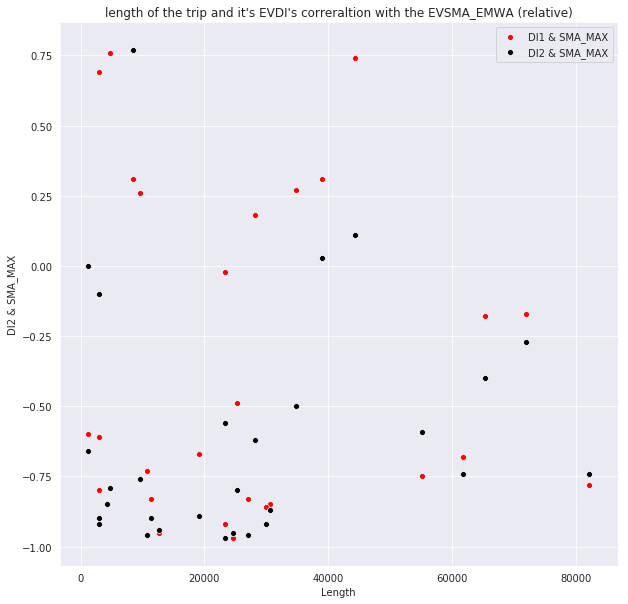

In [161]:
sns.scatterplot(x = DI_corr["Length"], 
                y = DI_corr["DI1 & SMA_MAX"], 
                color = "red", 
                label = "DI1 & SMA_MAX")
sns.scatterplot(x = DI_corr["Length"], 
                y = DI_corr["DI2 & SMA_MAX"], 
                color = "black", 
                label = "DI2 & SMA_MAX")
plt.title("length of the trip and it's EVDI's correraltion with the EVSMA_EMWA (relative)")
plt.show()

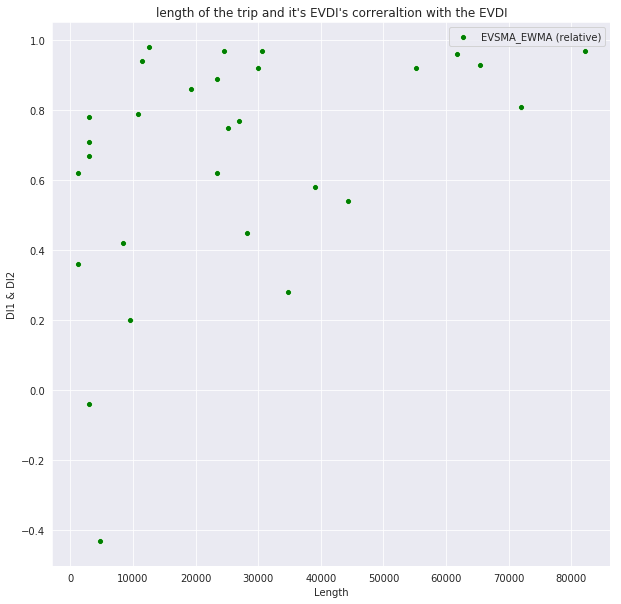

In [163]:
sns.scatterplot(x = DI_corr["Length"], 
                y = DI_corr["DI1 & DI2"], 
                color = "green", 
                label = "EVSMA_EWMA (relative)")
plt.title("length of the trip and it's EVDI's correraltion with the EVDI")
plt.show()

---

## EVBMI_Latest - BMS Temperature Min Latest and EVBMA_Latest - BMS Temperature Max Latest

In [10]:
trip_28 = data[data["tp"] == 28]

trip_28 = trip_28["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_28['EVSMA_EWMA'] = np.nan
trip_28['EVSMA_EWMA'].iloc[0] = trip_28["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_28)):
    temp = (trip_28["EVSMA_MAX"].iloc[i]*alpha) + (trip_28["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_28["EVSMA_EWMA"].iloc[i] = temp
    
trip_28["EVSMA_Shift"] = trip_28["EVSMA_EWMA"].shift(periods = 1)
trip_28["EVSMA_Shift"].iloc[0] = trip_28["EVSMA_EWMA"].iloc[0]
trip_28["EVSMA_EWMA"] = abs(trip_28["EVSMA_EWMA"] - trip_28["EVSMA_Shift"])

trip_28["EVBMA_Latest"] = data[data["tp"] == 28]["EVBMA_Latest"]
trip_28["EVBMI_Latest"] = data[data["tp"] == 28]["EVBMI_Latest"]

BM_data = trip_28[["EVBMA_Latest", "EVBMI_Latest", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
BM_data.sample(5)

,EVBMA_Latest,EVBMI_Latest,EVSMA_MAX,EVSMA_EWMA
349989,18.0,17.5,69.4,0.000310
352459,18.0,17.5,69.0,0.000437
364623,19.0,18.0,61.0,0.000201
354673,18.0,17.5,67.5,0.001453
353066,18.0,17.5,68.7,0.000466


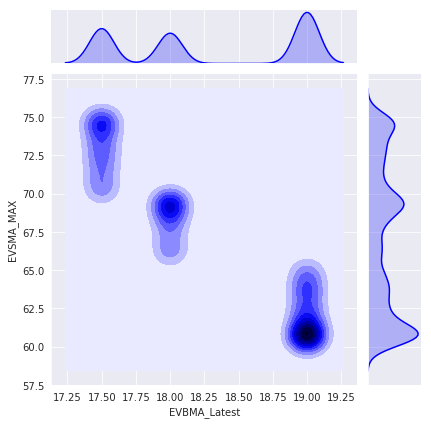

In [11]:
sns.jointplot(x = BM_data["EVBMA_Latest"], y = BM_data["EVSMA_MAX"], kind = "kde", color = "blue")
plt.show()

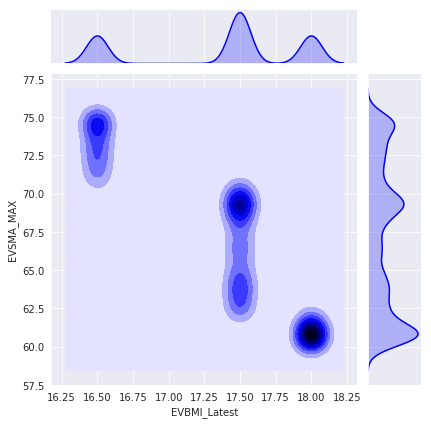

In [12]:
sns.jointplot(x = BM_data["EVBMI_Latest"], y = BM_data["EVSMA_MAX"], kind = "kde", color = "blue")
plt.show()

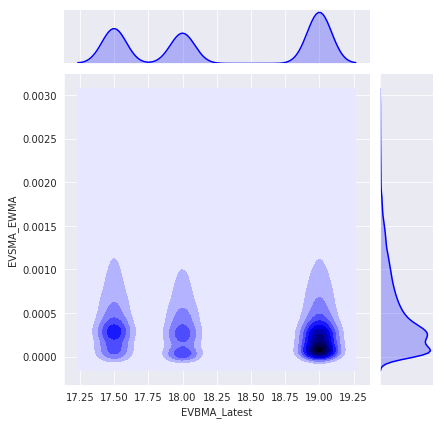

In [13]:
sns.jointplot(x = BM_data["EVBMA_Latest"], y = BM_data["EVSMA_EWMA"], kind = "kde", color = "blue")
plt.show()

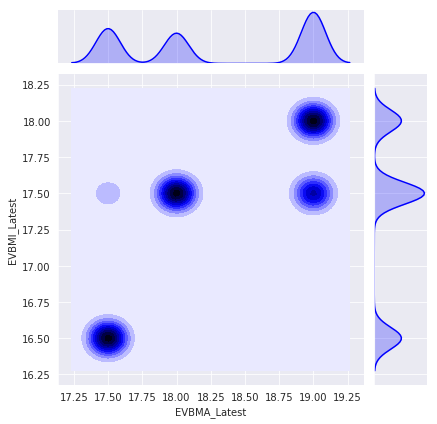

In [14]:
sns.jointplot(x = BM_data["EVBMA_Latest"], y = BM_data["EVBMI_Latest"], kind = "kde", color = "blue")
plt.show()

In [15]:
BM_data["EVBMA_Latest"].corr(BM_data["EVBMI_Latest"])

0.8170210414576117

In [16]:
trip_23 = data[data["tp"] == 23]

trip_23 = trip_23["EVSMA_MAX"].to_frame()
span = 600
alpha = 2/(1 + span)
trip_23['EVSMA_EWMA'] = np.nan
trip_23['EVSMA_EWMA'].iloc[0] = trip_23["EVSMA_MAX"].iloc[0]

for i in range(1, len(trip_23)):
    temp = (trip_23["EVSMA_MAX"].iloc[i]*alpha) + (trip_23["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
    trip_23["EVSMA_EWMA"].iloc[i] = temp
    
trip_23["EVSMA_Shift"] = trip_23["EVSMA_EWMA"].shift(periods = 1)
trip_23["EVSMA_Shift"].iloc[0] = trip_23["EVSMA_EWMA"].iloc[0]
trip_23["EVSMA_EWMA"] = abs(trip_23["EVSMA_EWMA"] - trip_23["EVSMA_Shift"])

trip_23["EVBMA_Latest"] = data[data["tp"] == 23]["EVBMA_Latest"]
trip_23["EVBMI_Latest"] = data[data["tp"] == 23]["EVBMI_Latest"]

BM_data_2 = trip_23[["EVBMA_Latest", "EVBMI_Latest", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
BM_data_2.sample(5)

,EVBMA_Latest,EVBMI_Latest,EVSMA_MAX,EVSMA_EWMA
223054,37.0,35.0,85.2,0.000406
243897,36.5,35.0,73.5,0.000494
229854,36.5,35.0,81.7,0.001537
262546,36.5,35.0,61.9,0.000671
277182,36.5,34.0,49.9,0.000188


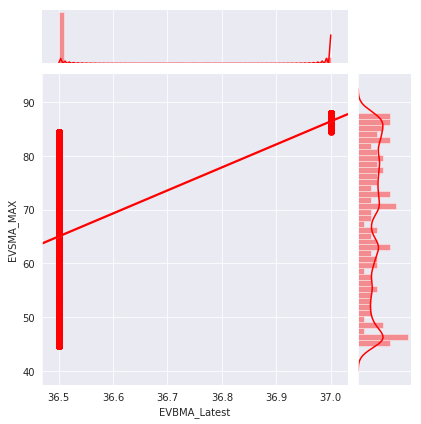

In [17]:
sns.jointplot(x = BM_data_2["EVBMA_Latest"], y = BM_data_2["EVSMA_MAX"], kind = "reg", color = "red")
plt.show()

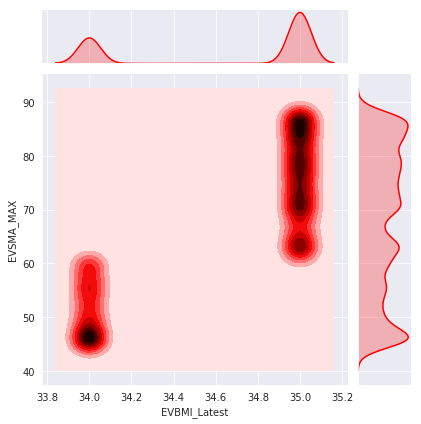

In [18]:
sns.jointplot(x = BM_data_2["EVBMI_Latest"], y = BM_data_2["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()

In [19]:
BM_data_2["EVBMA_Latest"].corr(BM_data_2["EVBMI_Latest"])

0.25699540064638354

In [20]:
def BM_relative_corr(data):
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_EWMA"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t["EVBMA_Latest"] = data[data["tp"] == i+1]["EVBMA_Latest"]
        trip_t["EVBMI_Latest"] = data[data["tp"] == i+1]["EVBMI_Latest"]
        
        temp_data = trip_t[["EVBMA_Latest", "EVBMI_Latest", "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data["EVBMA_Latest"].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data["EVBMI_Latest"].corr(temp_data["EVSMA_MAX"])
        c3 = temp_data["EVBMI_Latest"].corr(temp_data["EVBMA_Latest"])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        "BMA_Latest & SMA_MAX": corr_1,
        "BMI_Latest & SMA_MAX": corr_2,
        "BMA & BMI": corr_3
    })
    
    return SMA_corr

In [21]:
BM_corr = BM_relative_corr(data)

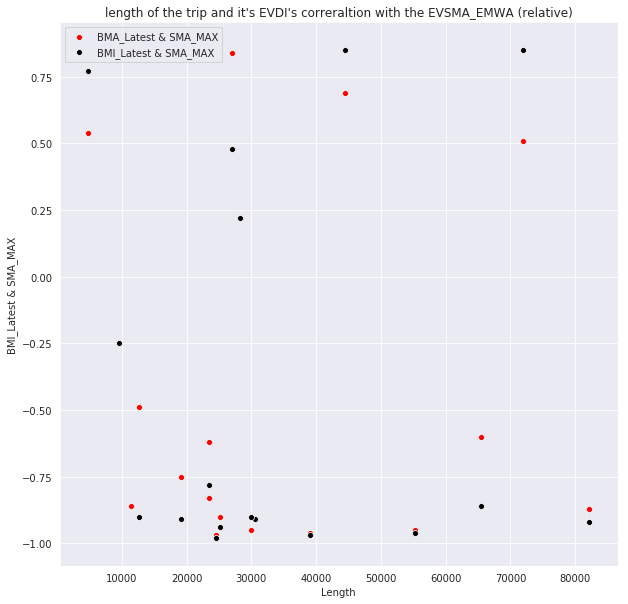

In [22]:
sns.scatterplot(x = BM_corr["Length"], 
                y = BM_corr["BMA_Latest & SMA_MAX"], 
                color = "red", 
                label = "BMA_Latest & SMA_MAX")
sns.scatterplot(x = BM_corr["Length"], 
                y = BM_corr["BMI_Latest & SMA_MAX"], 
                color = "black", 
                label = "BMI_Latest & SMA_MAX")
plt.title("length of the trip and it's EVDI's correraltion with the EVSMA_EMWA (relative)")
plt.show()

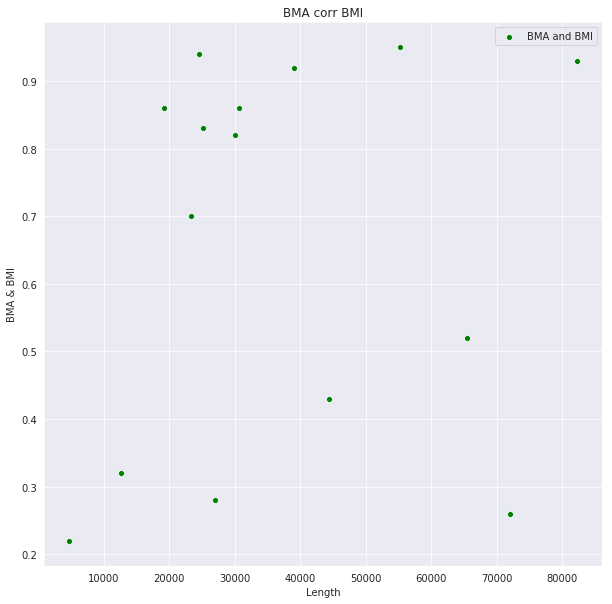

In [23]:
sns.scatterplot(x = BM_corr["Length"], 
                y = BM_corr["BMA & BMI"], 
                color = "green", 
                label = "BMA and BMI")
plt.title("BMA corr BMI")
plt.show()

In [24]:
BM_data_2["BM_diff"] = BM_data_2["EVBMA_Latest"] - BM_data_2["EVBMI_Latest"]

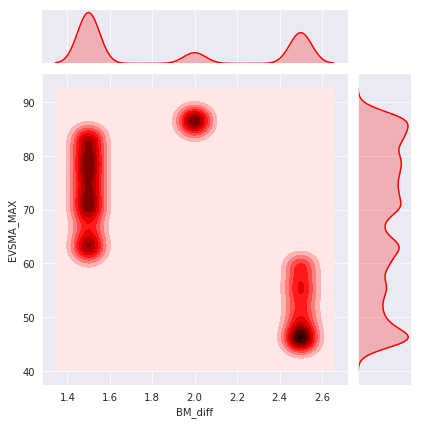

In [27]:
sns.jointplot(x = BM_data_2["BM_diff"], y = BM_data_2["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()